---

<h1><center>P R O J E C T</center></h1>

---

Click on  below link to download dataset: <br>
[Dataset link](https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2022.zip)


---
### importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pycountry
import plotly.express as px
from wordcloud import WordCloud
import warnings; warnings.filterwarnings('ignore')

---
### reading dataset

In [2]:
survey_df = pd.read_csv('sods2022/survey_results_public.csv')   

In [3]:
schema_df = pd.read_csv('sods2022/survey_results_schema.csv')     

In [4]:
survey_df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


---
###  preprocessing

---
we need column _qname_ as index of `schema_df` DataFrame

In [4]:
schema_df.set_index('qname', inplace=True)

In [5]:
schema_df = schema_df.question

---
  only data in _question_ column is useful, so we will delete other columns

---
After deletion

In [ ]:
schema_df

In [9]:
schema_df.index

Index(['S0', 'MetaInfo', 'S1', 'MainBranch', 'Employment', 'RemoteWork',
       'CodingActivities', 'S2', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'Country', 'Currency',
       'CompTotal', 'CompFreq', 'S3', 'Language', 'Database', 'Platform',
       'Webframe', 'MiscTech', 'ToolsTech', 'NEWCollabTools', 'OpSys',
       'VersionControlSystem', 'VCInteraction', 'VCHosting',
       'OfficeStackAsync', 'OfficeStackSync', 'Blockchain', 'S4', 'NEWSOSites',
       'SOVisitFreq', 'SOAccount', 'SOPartFreq', 'SOComm', 'S5', 'Age',
       'Gender', 'Trans', 'Sexuality', 'Ethnicity', 'Accessibility',
       'MentalHealth', 'S6', 'TBranch', 'ICorPM', 'WorkExp', 'Knowledge',
       'Frequency', 'TimeSearching', 'TimeAnswering', 'Onboarding',
       'ProfessionalTech', 'SOTeamsUsage', 'TrueFalse', 'S7', 'SurveyLength',
       'SurveyEase', 'Knowledge_1', 'Knowledge_2', 'Knowl

---
---
### plot function

In [7]:
def custom_plot(series, plot_height=15, plot_width=5, 
                y_label_font_size=13.5, 
                title = '', title_font_size=15,
                percent_font_size=14,
                color = 'light:#59C1BD'):
       
    # create figure to display plot
    plt.figure( figsize=(plot_width, plot_height) )
    
    # to hide square of the plot 
    custom_params = {
                        "axes.spines.bottom": False, 
                        "axes.spines.right": False,
                        "axes.spines.left"  : False, 
                        "axes.spines.top": False 
                    }

    sns.set_theme(style="white", rc=custom_params)
    
    # creating different shades of colors(color palette) of size series length
    # pal stores rgb values for different color shades 
    pal = sns.color_palette(color, len(series)) # light:#5A9
    
    # argsort return indices of elements according to sorting order..
    # means lowest number will be indexed as 0, and so on
    # rank stores rank of series whr highest count value comes first
    # using this rank to assign color shades to diffrnt bars in plot
    rank = series.argsort().argsort()
    
    ax = sns.barplot(x = series.values, y=series.index, 
                     #palette='PuBuGn_r'
                     #order=series.sort_values('Growth').State,
                     palette=np.array(pal[::])[rank]
                    )

    # to calculate percentage
    s = series.values.sum()

    for rect in ax.patches:
        x_value = rect.get_width()
        y_value = (rect.get_y() + rect.get_height() / 2)
        space = 0

        # calculating percentage and assigning to variable label
        label = "{:.2f}%".format( (100*x_value/s))

        # to display percentage value on bar
        plt.annotate(
            text=label,                    # Use `label` as label
            xy=((x_value/2)-5, y_value),   # Place label at end of the bar, xy argument..maybe coordinate
            xytext=(space, 0),             # Horizontally shift label by `space`
            textcoords="offset points",    # Interpret `xytext` as offset in points
            va='center',                   # Vertically center label
            color = 'white', 
            #ha='center',
            weight='bold', size=percent_font_size
        ) 

    plt.title('\n'+title+'\n', 
              fontdict=
              {
                  "color": 'black',
                  "weight":'bold',  
                  "size":title_font_size
              }
             )
    
    
    plt.yticks(size=y_label_font_size)#, weight='bold')
    plt.xticks([], []) # to hide xticks
    
    f_dict={"color": 'black',"weight":'bold',  "size":15}
    plt.figtext(.74, .042, "Total Responses: {}".format(s), 
                fontdict = f_dict);

---
---

## what is your main branch..?

In [11]:
def MainBranch_ylabel_text_process(s):
    if s == 'I am not primarily a developer, but I write code sometimes as part of my work':
        return 'Not developer, write\n code as part of work'
    elif s == 'I used to be a developer by profession, but no longer am':
        return 'developer by profession\n but no longer'
    elif s == 'I am a developer by profession':
        return 'I am a developer\n by profession'
    elif s == 'I code primarily as a hobby':
        return 'I code primarily\n as a hobby'
    else:
        return s

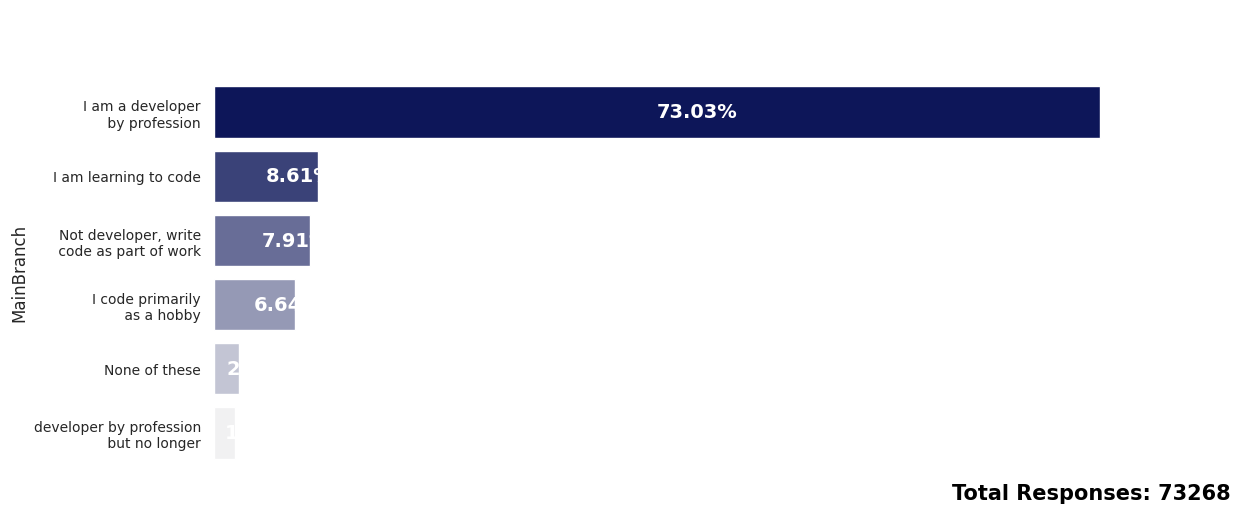

In [12]:
survey_df['MainBranch'] = survey_df.MainBranch.apply(MainBranch_ylabel_text_process, ) 

mb = survey_df.MainBranch.value_counts()

custom_plot(
                mb, plot_height=5, y_label_font_size=10, plot_width=12,
                color = 'light:#000C66'           
            )

---
## How old is the average professional developer..?

In [13]:
# Age

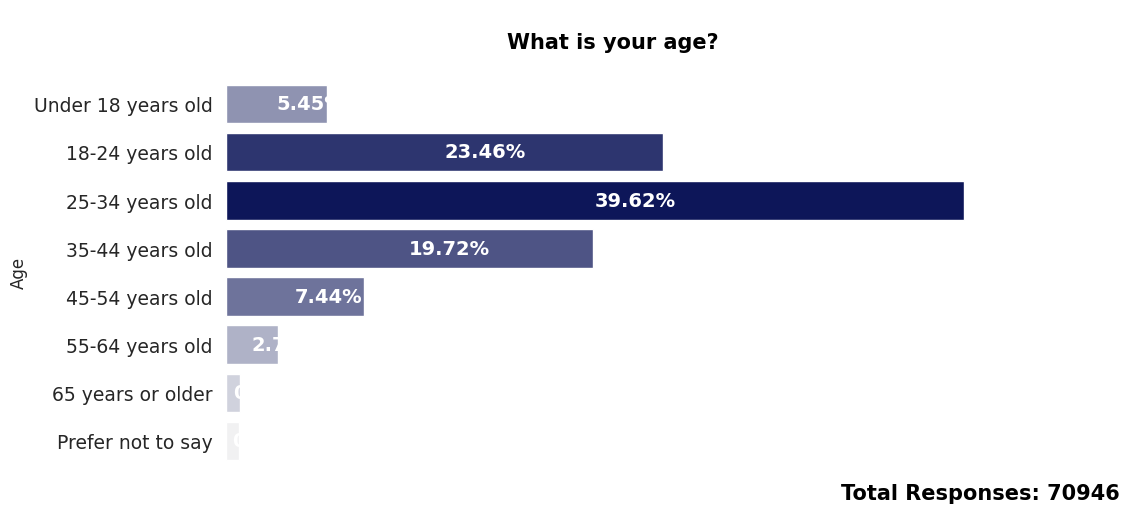

In [18]:
reorder_list = ['Under 18 years old', '18-24 years old',
               '25-34 years old', '35-44 years old', 
                '45-54 years old', '55-64 years old', 
                '65 years or older', 'Prefer not to say']

age_data = survey_df.Age.value_counts().reindex( reorder_list )

custom_plot(age_data, plot_height=5, color='light:#000C66',
           title = schema_df.Age, plot_width=10)

---
## Employment status of an employee

In [19]:
# Employment

In [23]:
def colum_expand( s ):
    d = {}
    
    for t in s.dropna().values:
        for i in t.split(';'):
            if i in d.keys():
                d[i] += 1
            else:
                d[i] = 1
    
    return pd.Series(d)
        

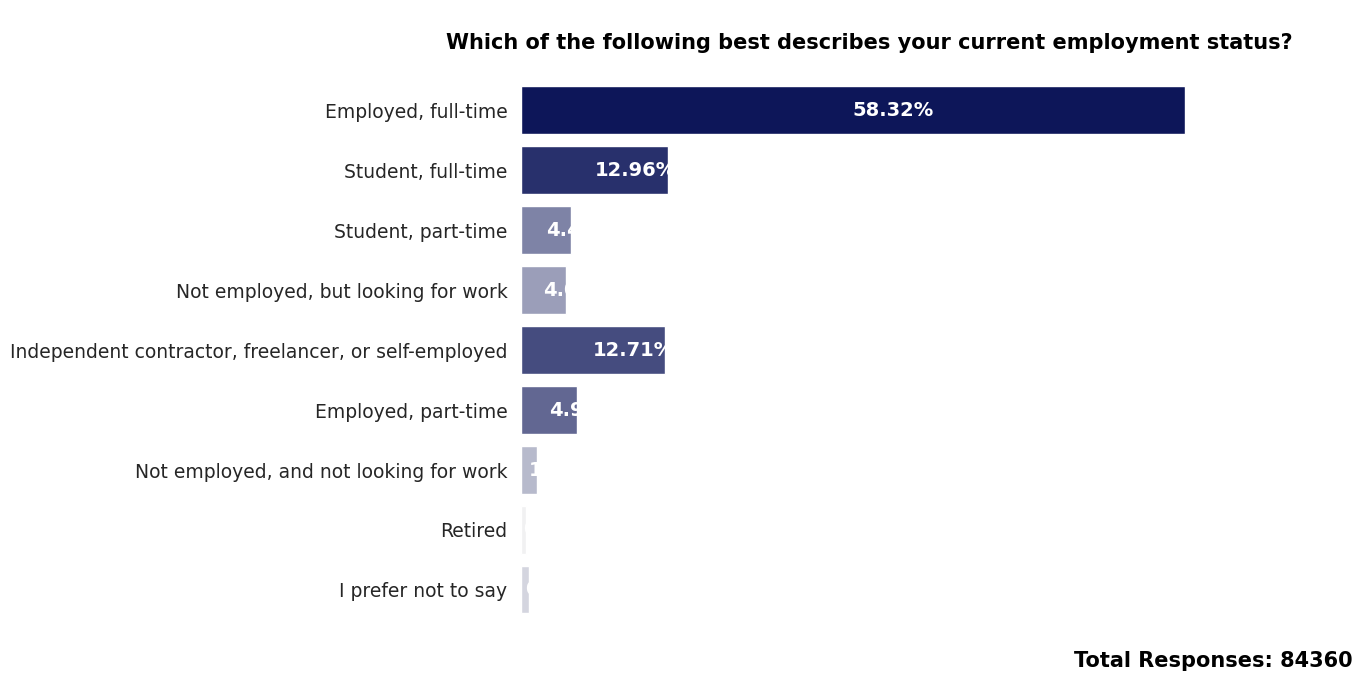

In [24]:
emp = colum_expand(survey_df.Employment)

custom_plot(emp, plot_height=7, color='light:#000C66',
           title=schema_df.Employment, plot_width=9)

---
## mode of working of employee(remote/hybrid)

In [ ]:
# RemoteWork

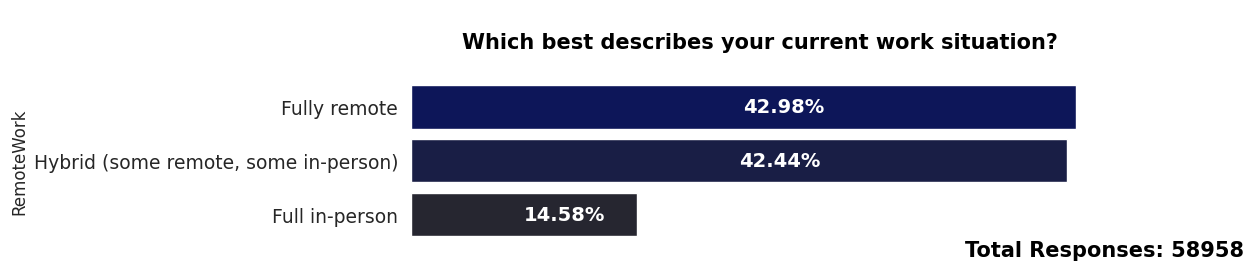

In [27]:
remote_work = survey_df.RemoteWork.value_counts()

custom_plot(remote_work, plot_height=2.1, plot_width=9
           , color='dark:#000C66', title=schema_df.RemoteWork)

---
---

## how many of you write code outside of your work

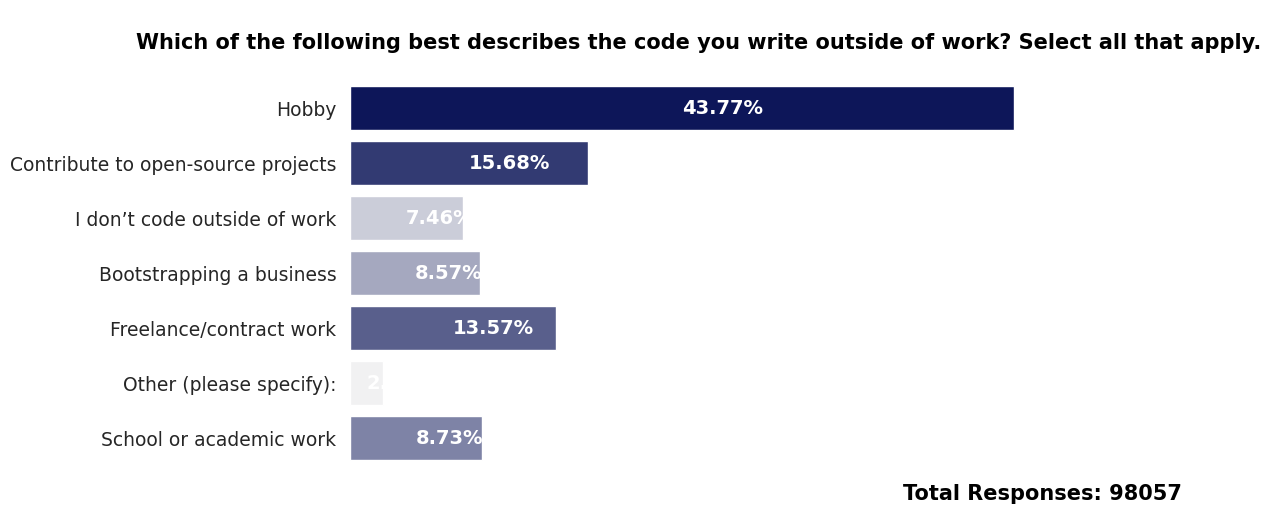

In [30]:
coding_act = colum_expand(survey_df.CodingActivities)

custom_plot(coding_act, plot_height=5, plot_width=9, 
            color='light:#000C66', title=schema_df.CodingActivities)

---
---

## What is your highest level of formal education..?

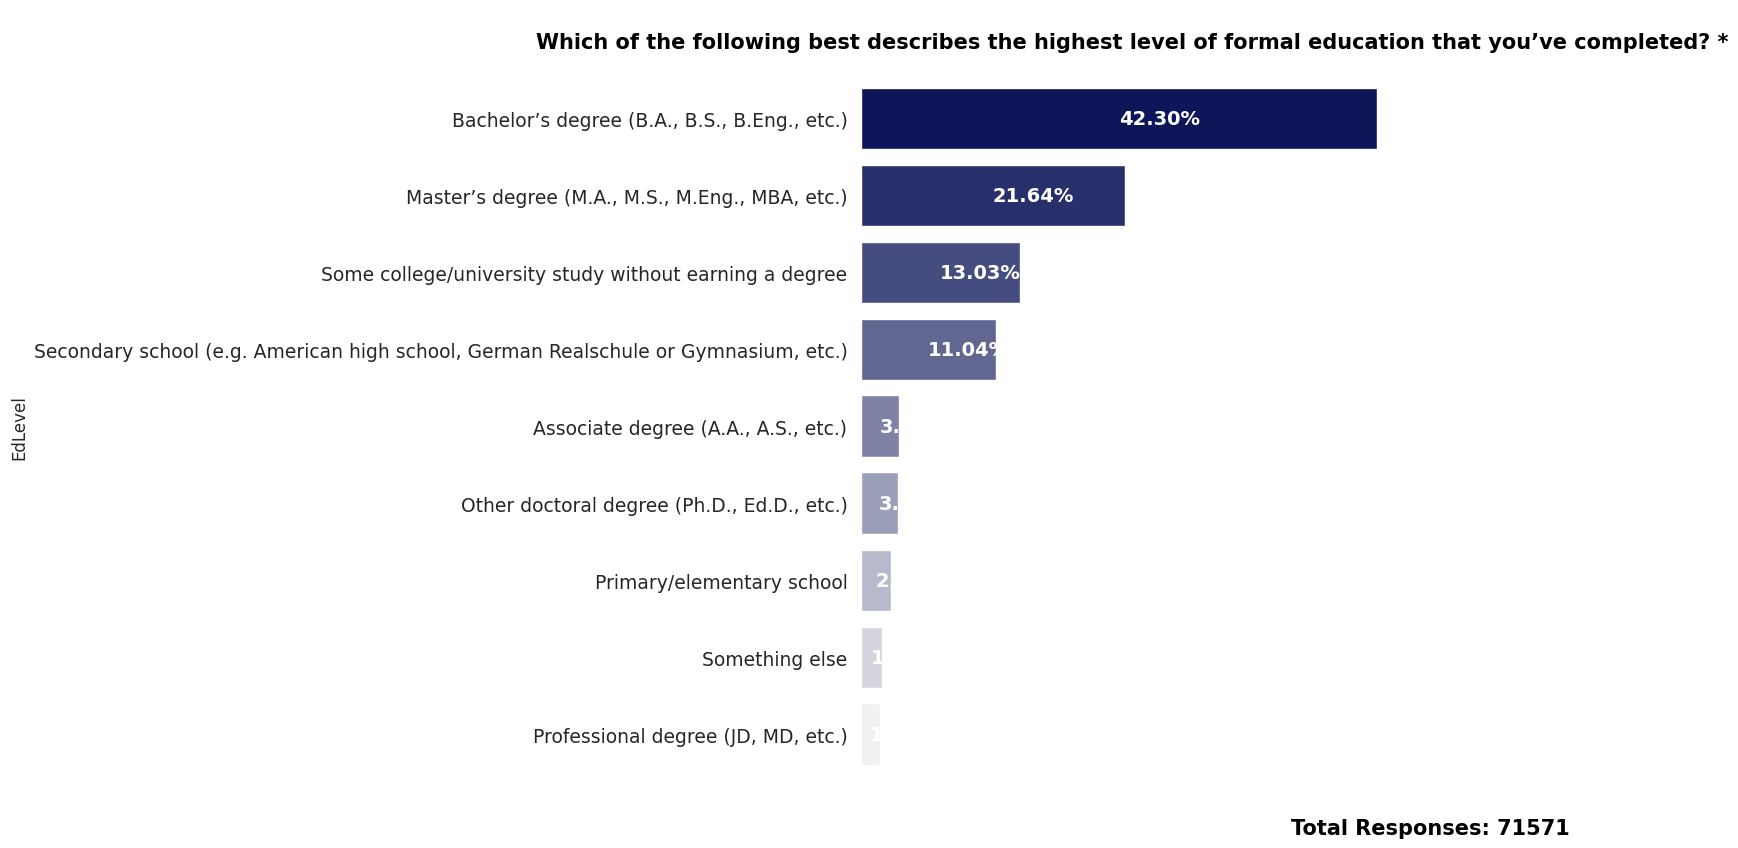

In [67]:
edu = survey_df.EdLevel.value_counts()

custom_plot(edu, plot_height=9, plot_width=7, color='light:#000C66',
           title=schema_df.EdLevel)

---
---

## How did you learn to code

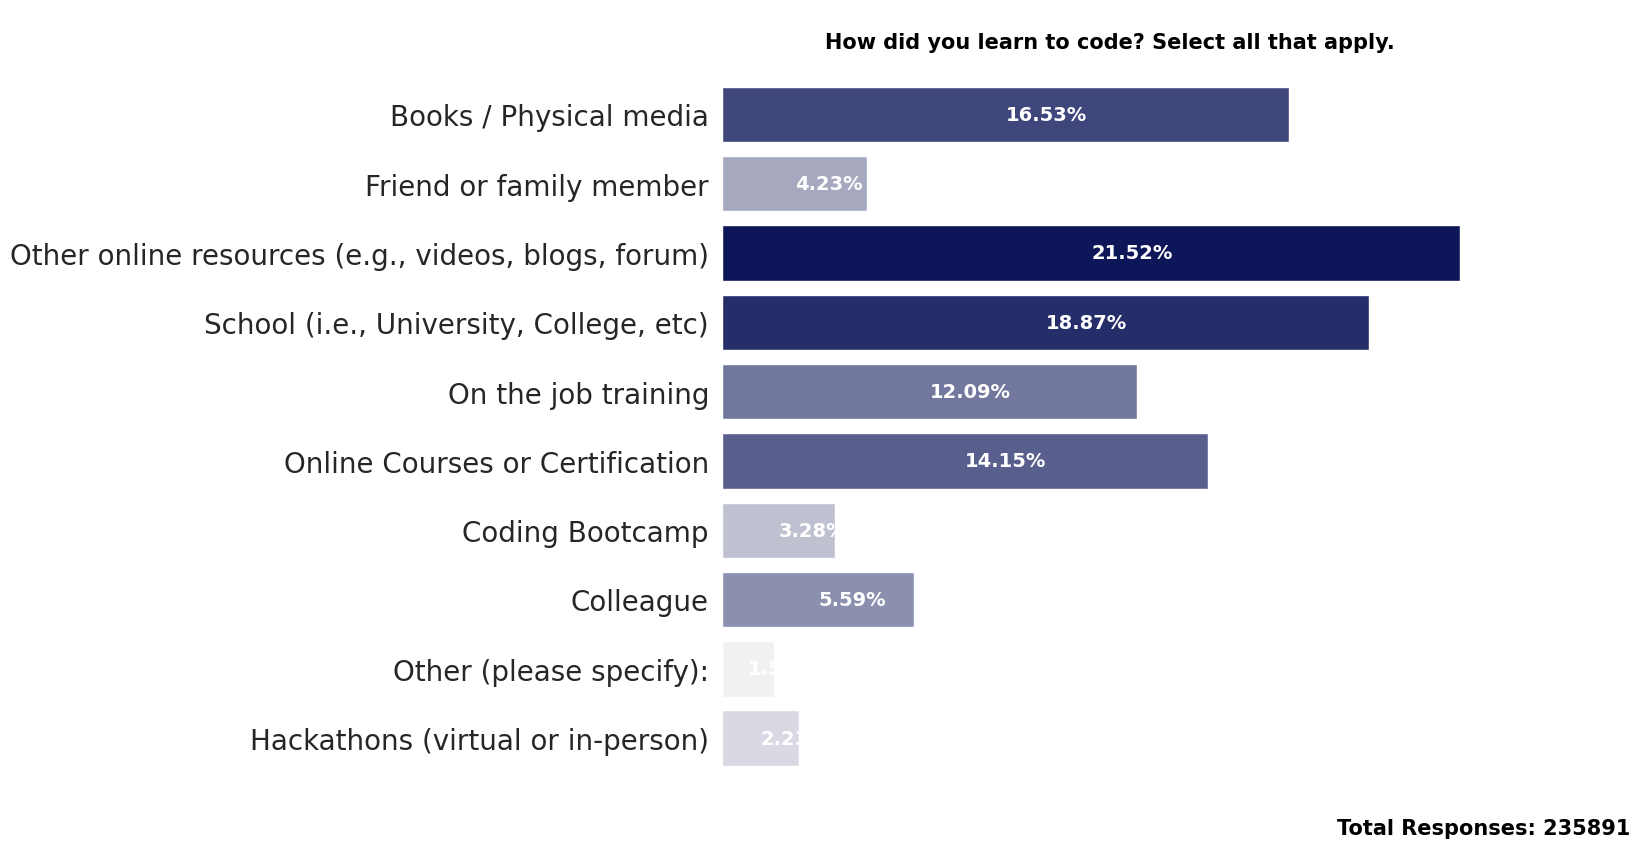

In [31]:
learn_code_data = colum_expand(survey_df.LearnCode)



custom_plot(learn_code_data, plot_height=9, plot_width=10,
           color='light:#000C66', title=schema_df.LearnCode,
           y_label_font_size=20)


---
## What online resources do you use to learn to code?

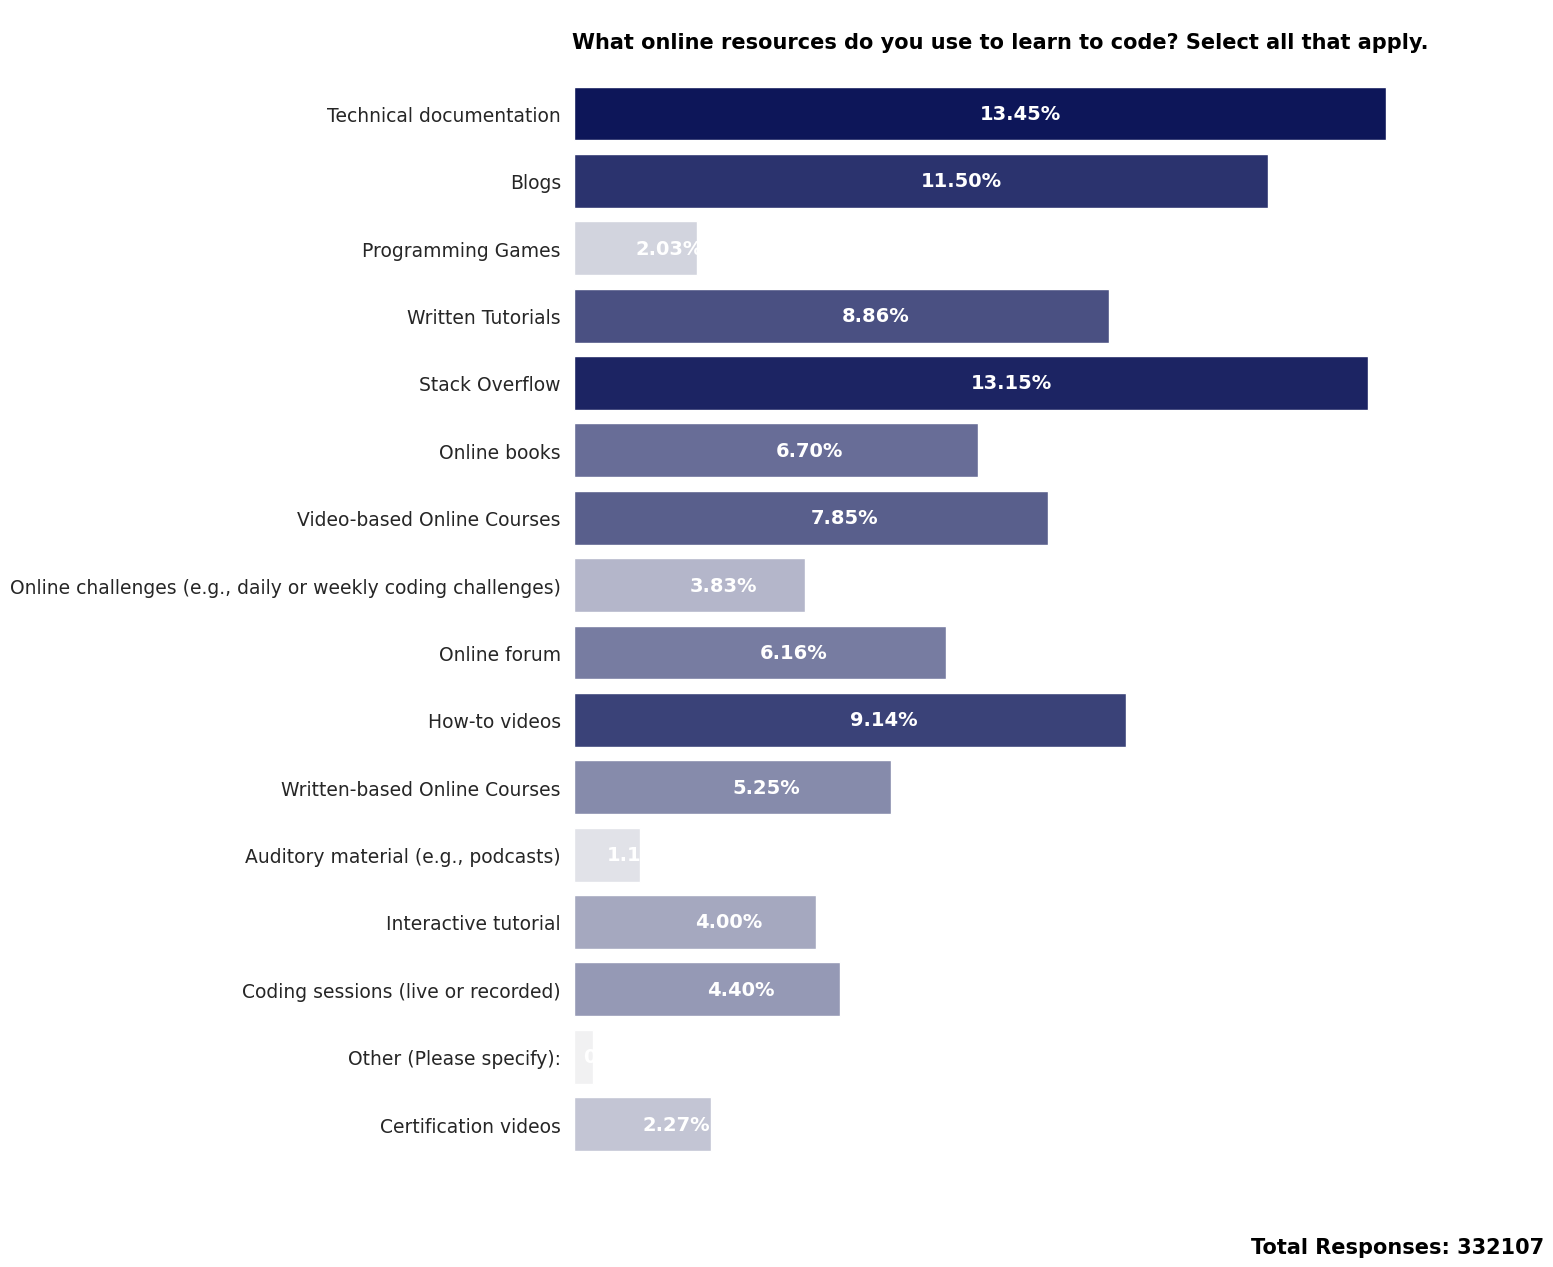

In [32]:
learn_code_online = colum_expand(survey_df.LearnCodeOnline)


custom_plot(learn_code_online, plot_height=14, plot_width=11,
           color='light:#000C66', title=schema_df.LearnCodeOnline)


---
---

### What online courses or certifications do you use to learn to code?

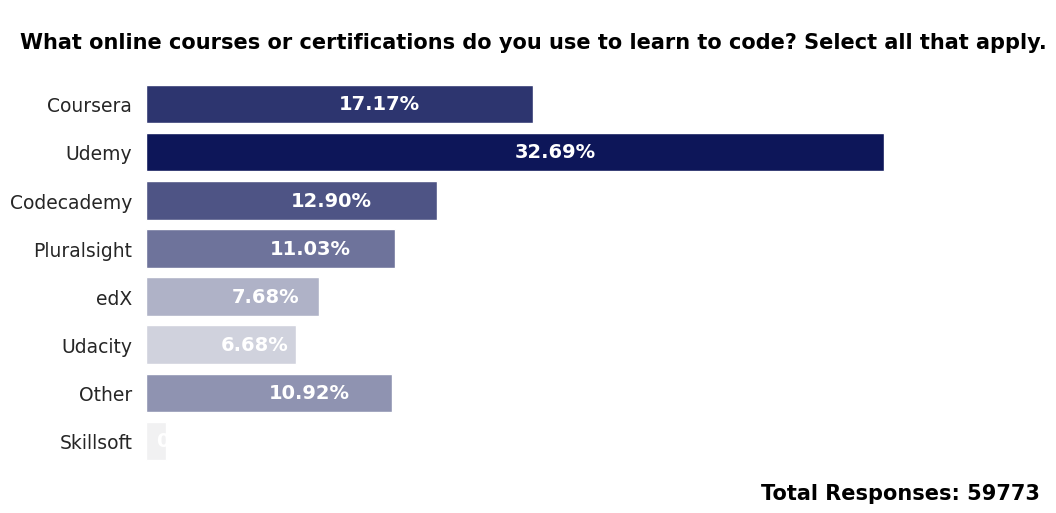

In [36]:
learn_code_cert = colum_expand(survey_df.LearnCodeCoursesCert)

custom_plot(learn_code_cert, plot_height=5, plot_width=10, 
           color='light:#000C66', title=schema_df.LearnCodeCoursesCert)

---
---

### how many years have you been coding in total (Including education)

In [37]:
def make_groups(s):
    try:
        s = int(s)                         
        if s > 0 and s < 5:
            return '0 to 5 years'
        if s > 5 and s < 10:
            return '5 to 10 years'
        if s > 10 and s < 15:
            return '10 to 15 years'
        if s > 15 and s < 20:
            return '15 to 20 years'
        if s > 20 and s < 25:
            return '20 to 25 years'
        if s > 25 and s < 30:
            return '25 to 30 years'
        if s > 30 and s < 35:
            return '30 to 35 years'
        if s > 35 and s < 40:
            return '35 to 40 years'
        if s > 40 and s < 45:
            return '40 to 45 years'
        if s > 45 and s < 50:
            return '45 to 50 years'
    except (TypeError, ValueError):
        pass
    

In [38]:
survey_df['coding_experience'] = survey_df.YearsCode.apply(make_groups)

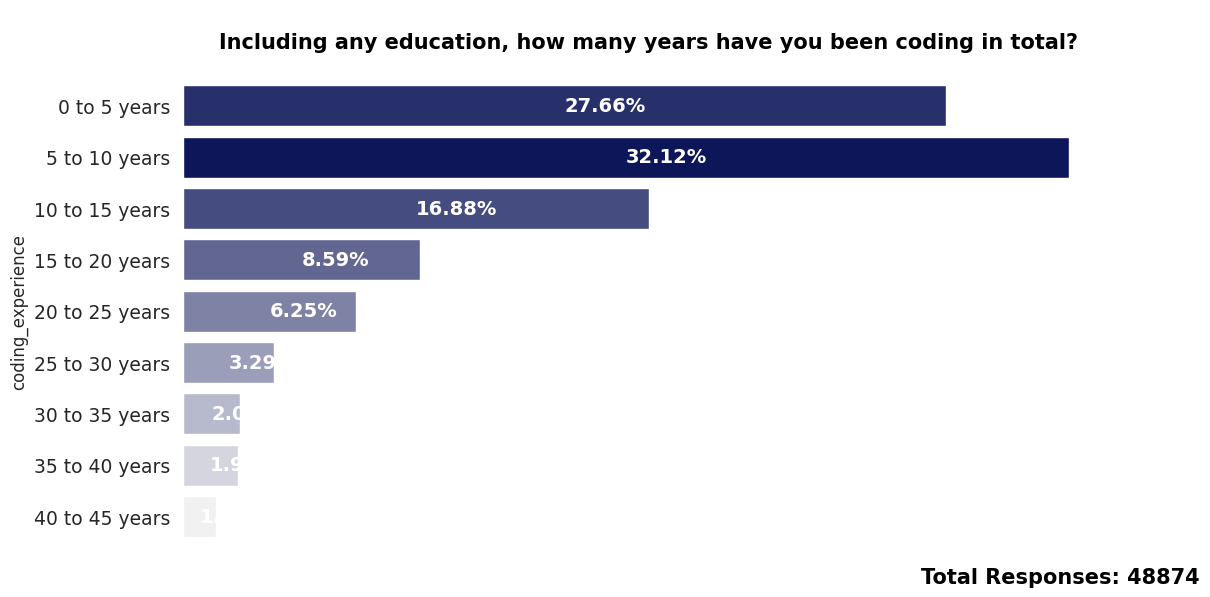

In [40]:

reorder_list = ['0 to 5 years', '5 to 10 years', '10 to 15 years',
               '15 to 20 years', '20 to 25 years', '25 to 30 years',
               '30 to 35 years','35 to 40 years', '40 to 45 years']

ce = survey_df.coding_experience.value_counts().reindex(reorder_list)
 
custom_plot(ce, plot_height=6, plot_width=12, 
            title=schema_df.YearsCode, color='light:#000C66')

---
---

### how many years have you been coding in total ( not Including education)

In [ ]:
# YearsCodePro

In [46]:
survey_df['prof_code_exp'] = survey_df.YearsCodePro.dropna().apply(make_groups)

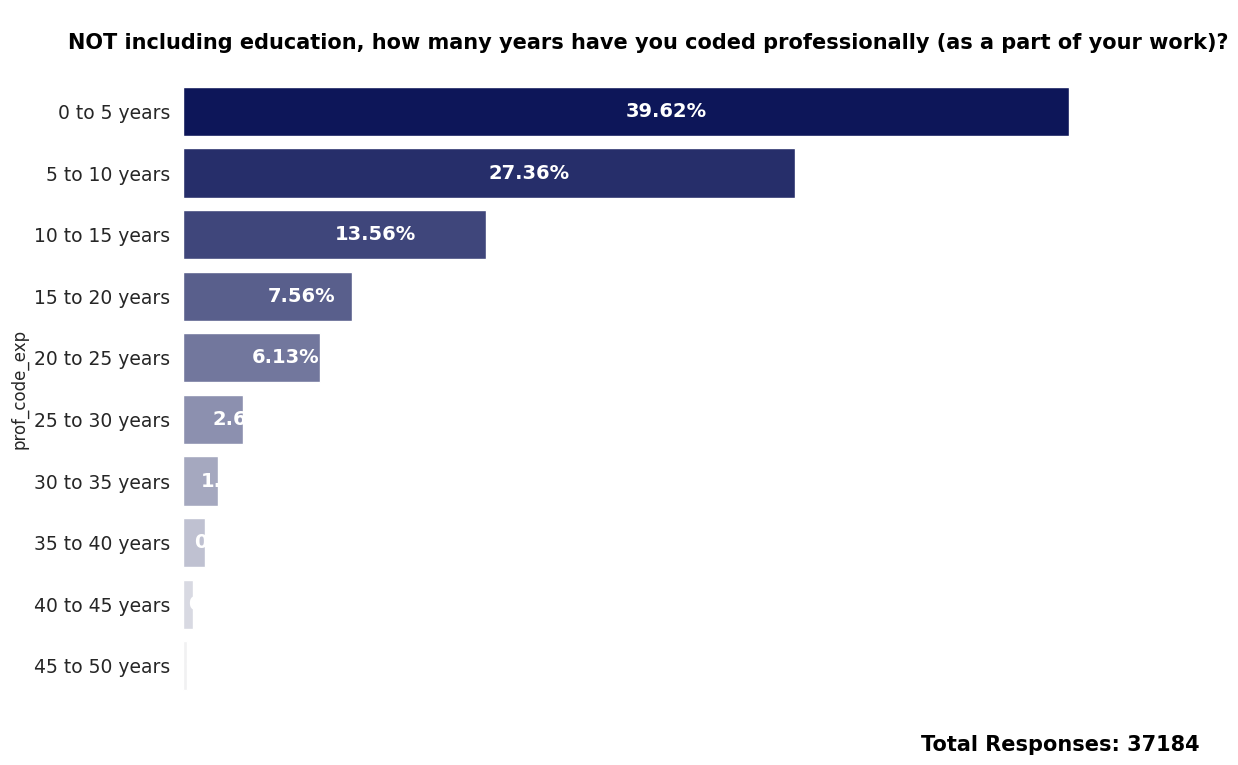

In [49]:
pce = survey_df.prof_code_exp.value_counts()

custom_plot(pce, plot_height=8,plot_width=12,
           title=schema_df.YearsCodePro, color='light:#000C66')

---
---

### what kind of developer you are..?

In [ ]:
# DevType

In [50]:
schema_df.DevType

'Which of the following describes your current job? Please select all that apply.'

In [51]:
survey_df.DevType

0                                                      NaN
1                                                      NaN
2        Data scientist or machine learning specialist;...
3                                    Developer, full-stack
4        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73263                                  Developer, back-end
73264        Data scientist or machine learning specialist
73265    Developer, full-stack;Developer, desktop or en...
73266    Developer, front-end;Developer, desktop or ent...
73267    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

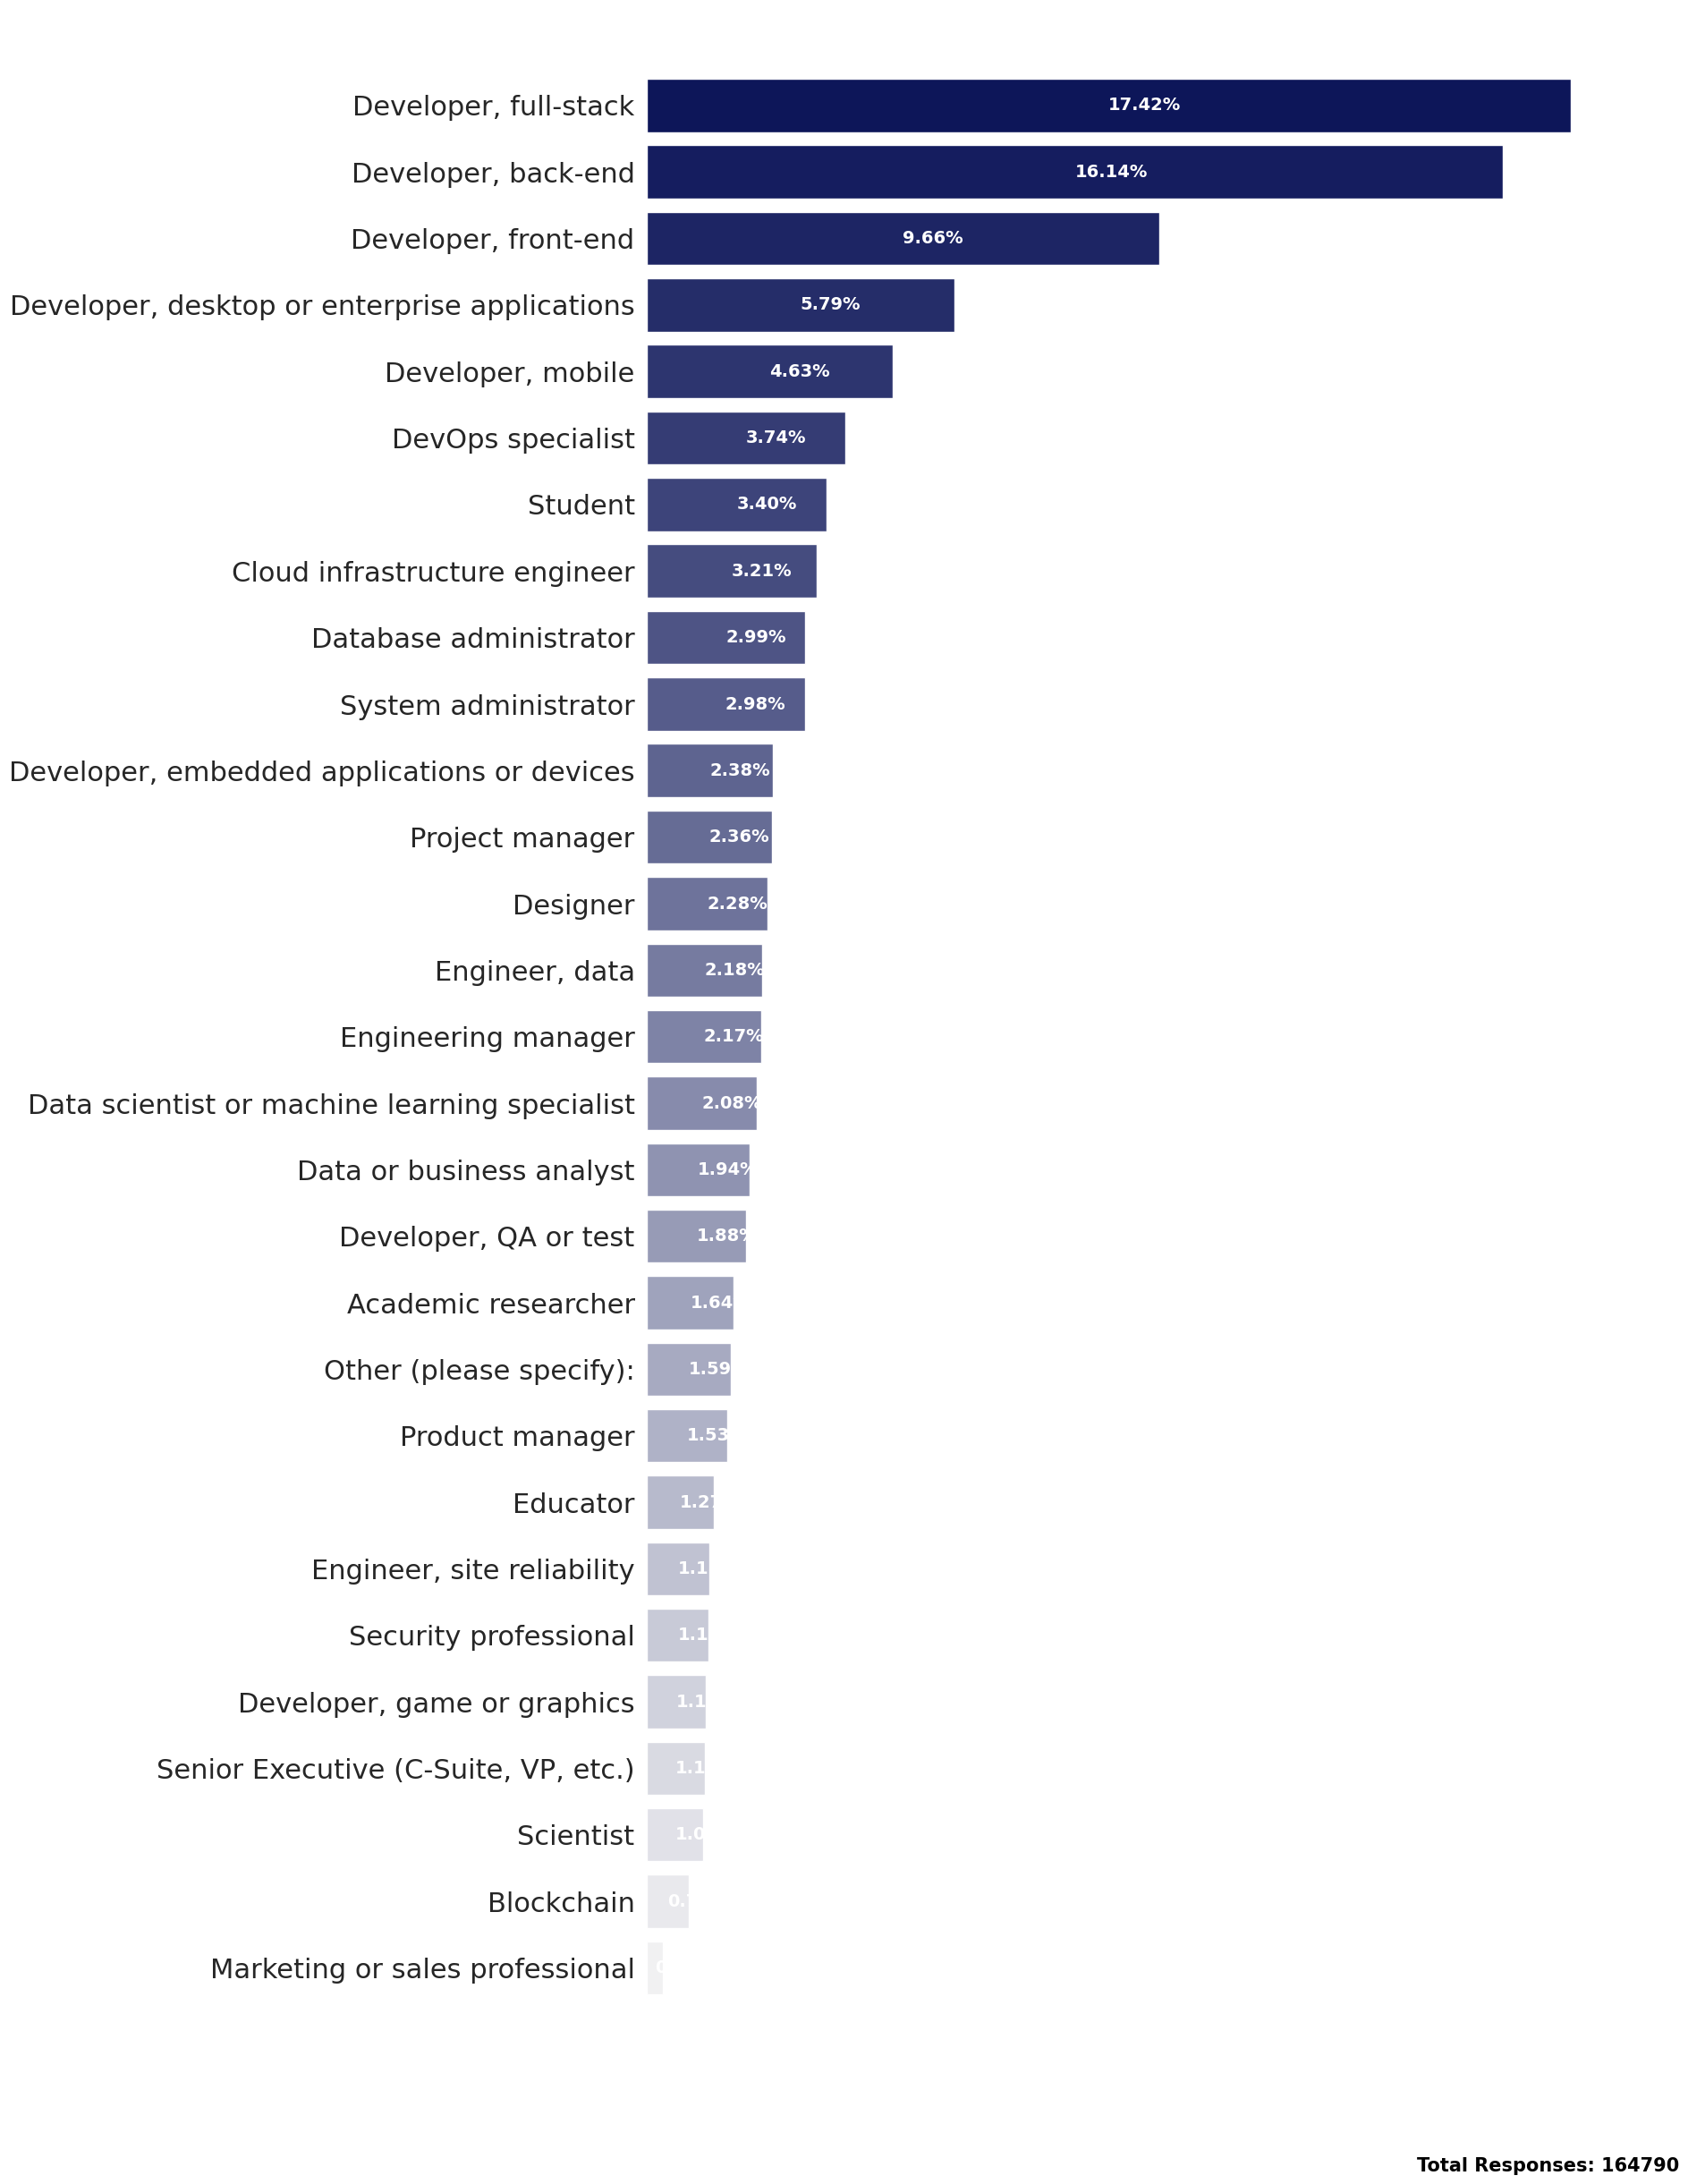

In [53]:
dev_type = colum_expand(survey_df.DevType)

dev_type = dev_type.sort_values(ascending=False)

custom_plot(dev_type, color='light:#000C66', plot_height=28,
           plot_width=14, y_label_font_size=22)

# WordCloud for developer type

In [58]:
words = ' '.join((job for job in survey_df.DevType.dropna().str.replace(';', ' ').str.replace(',', ' ')))

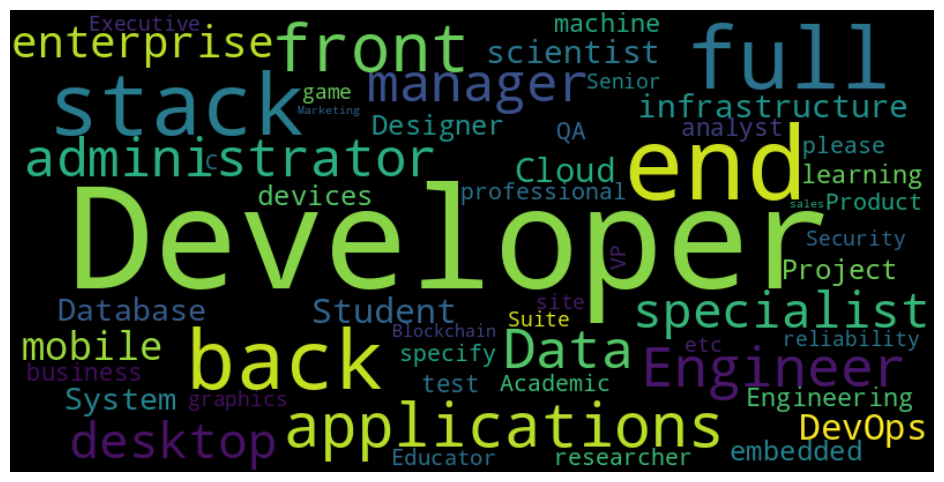

In [61]:
# Generate word cloud
wordcloud = WordCloud(collocation_threshold=int(1e6), width=800, height=400,
                      background_color='black').generate(words)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

---
---

## what is organization size of the developer...?

In [ ]:
# OrgSize

In [62]:
schema_df.OrgSize

'Approximately how many people are employed by the company or organization you currently work for? '

In [65]:
survey_df.OrgSize.value_counts()

OrgSize
20 to 99 employees                                    10343
100 to 499 employees                                   9289
10,000 or more employees                               6922
1,000 to 4,999 employees                               5736
2 to 9 employees                                       4887
10 to 19 employees                                     4251
500 to 999 employees                                   3645
Just me - I am a freelancer, sole proprietor, etc.     2771
5,000 to 9,999 employees                               2189
I don’t know                                           1006
Name: count, dtype: int64

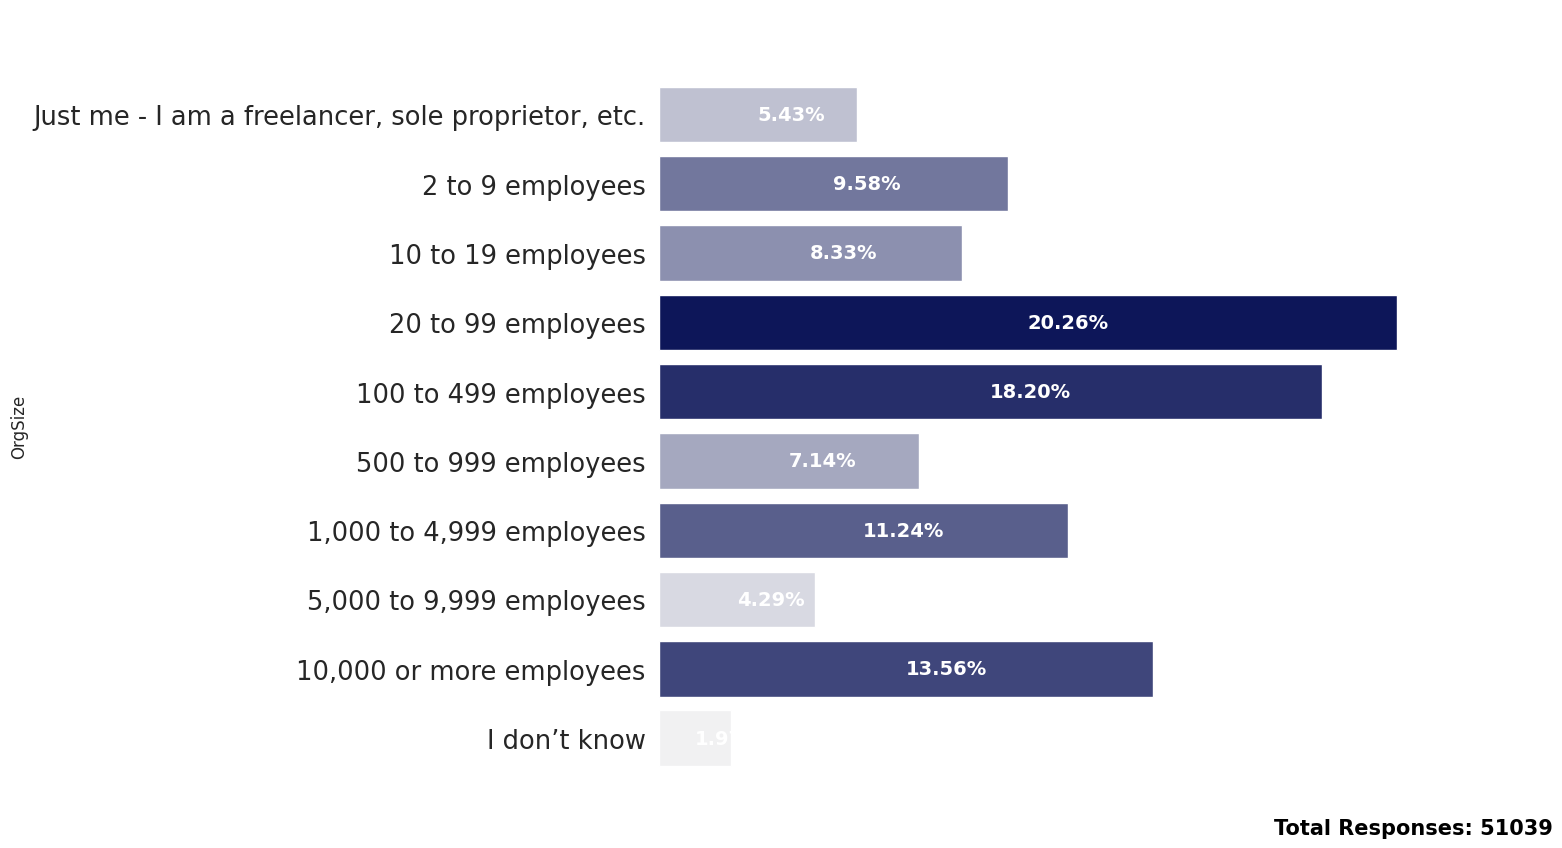

In [66]:
reorder_list = [
    "Just me - I am a freelancer, sole proprietor, etc.",
    "2 to 9 employees", "10 to 19 employees", "20 to 99 employees", 
    "100 to 499 employees", "500 to 999 employees", 
    "1,000 to 4,999 employees", "5,000 to 9,999 employees",
    "10,000 or more employees", "I don’t know"           
]
                                                    
org_size = survey_df.OrgSize.value_counts().reindex(reorder_list)

custom_plot(org_size, plot_height=9, plot_width=10,
           color = 'light:#000C66',
           y_label_font_size=18.5)

## donut plot function using pie plot

In [104]:
def plot_pie(data , title='', distance_btwn_pieces=0.09, startangle=-11):
    
    explode = (distance_btwn_pieces,) * len(data)
    plt.figure(figsize=(14,10)) 
    

    plt.pie( data, explode=explode,  labels=data.index, pctdistance=0.75,
             colors = ['red', 'blue', 'yellow','pink','blue'],
             wedgeprops={'linewidth': 1.5, 'edgecolor' : "green" }, 
             textprops={"weight":'bold', "size":20, 'family':'serif'}, 
             autopct='%1.1f%%',  startangle=startangle, shadow=True,
           )

    #plt.setp(pcts, color='black')
    hfont = {'fontname': 'serif', 'weight': 'bold'}
    plt.title(title, size=25, **hfont)
    
    centre_circle = plt.Circle((-0.08,0), 0.5, fc='white')
    fig = plt.gcf().gca().add_artist(centre_circle)
    ;
    


---
---

### What level of influence developer, have over new technology purchases at your organization?

In [ ]:
# PurchaseInfluence

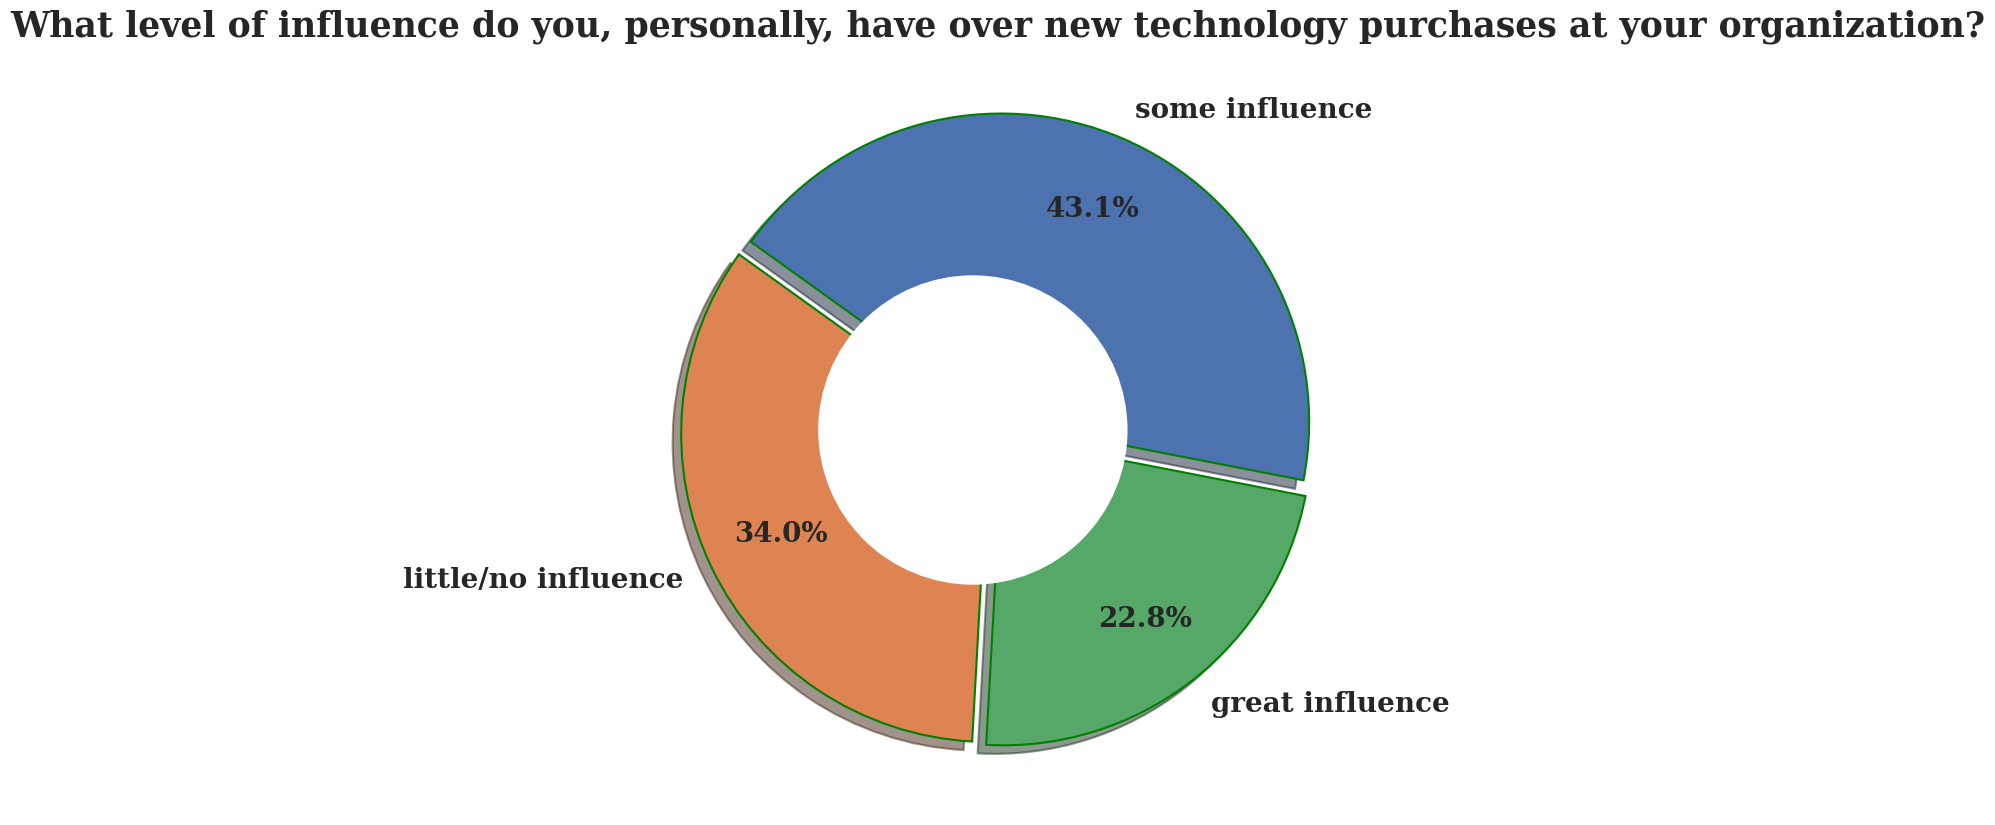

In [76]:
def shorten_names(s):
    if s == 'I have some influence':
        return 'some influence'
    elif s == 'I have little or no influence':
        return 'little/no influence'
    elif s == 'I have a great deal of influence':
        return 'great influence'

tech_influence = survey_df.PurchaseInfluence.apply(shorten_names)
tech_influence = tech_influence.value_counts()

plot_pie(data=tech_influence, 
         title = schema_df.PurchaseInfluence,
         distance_btwn_pieces=0.03
        )

---
---

### Where do developer live?

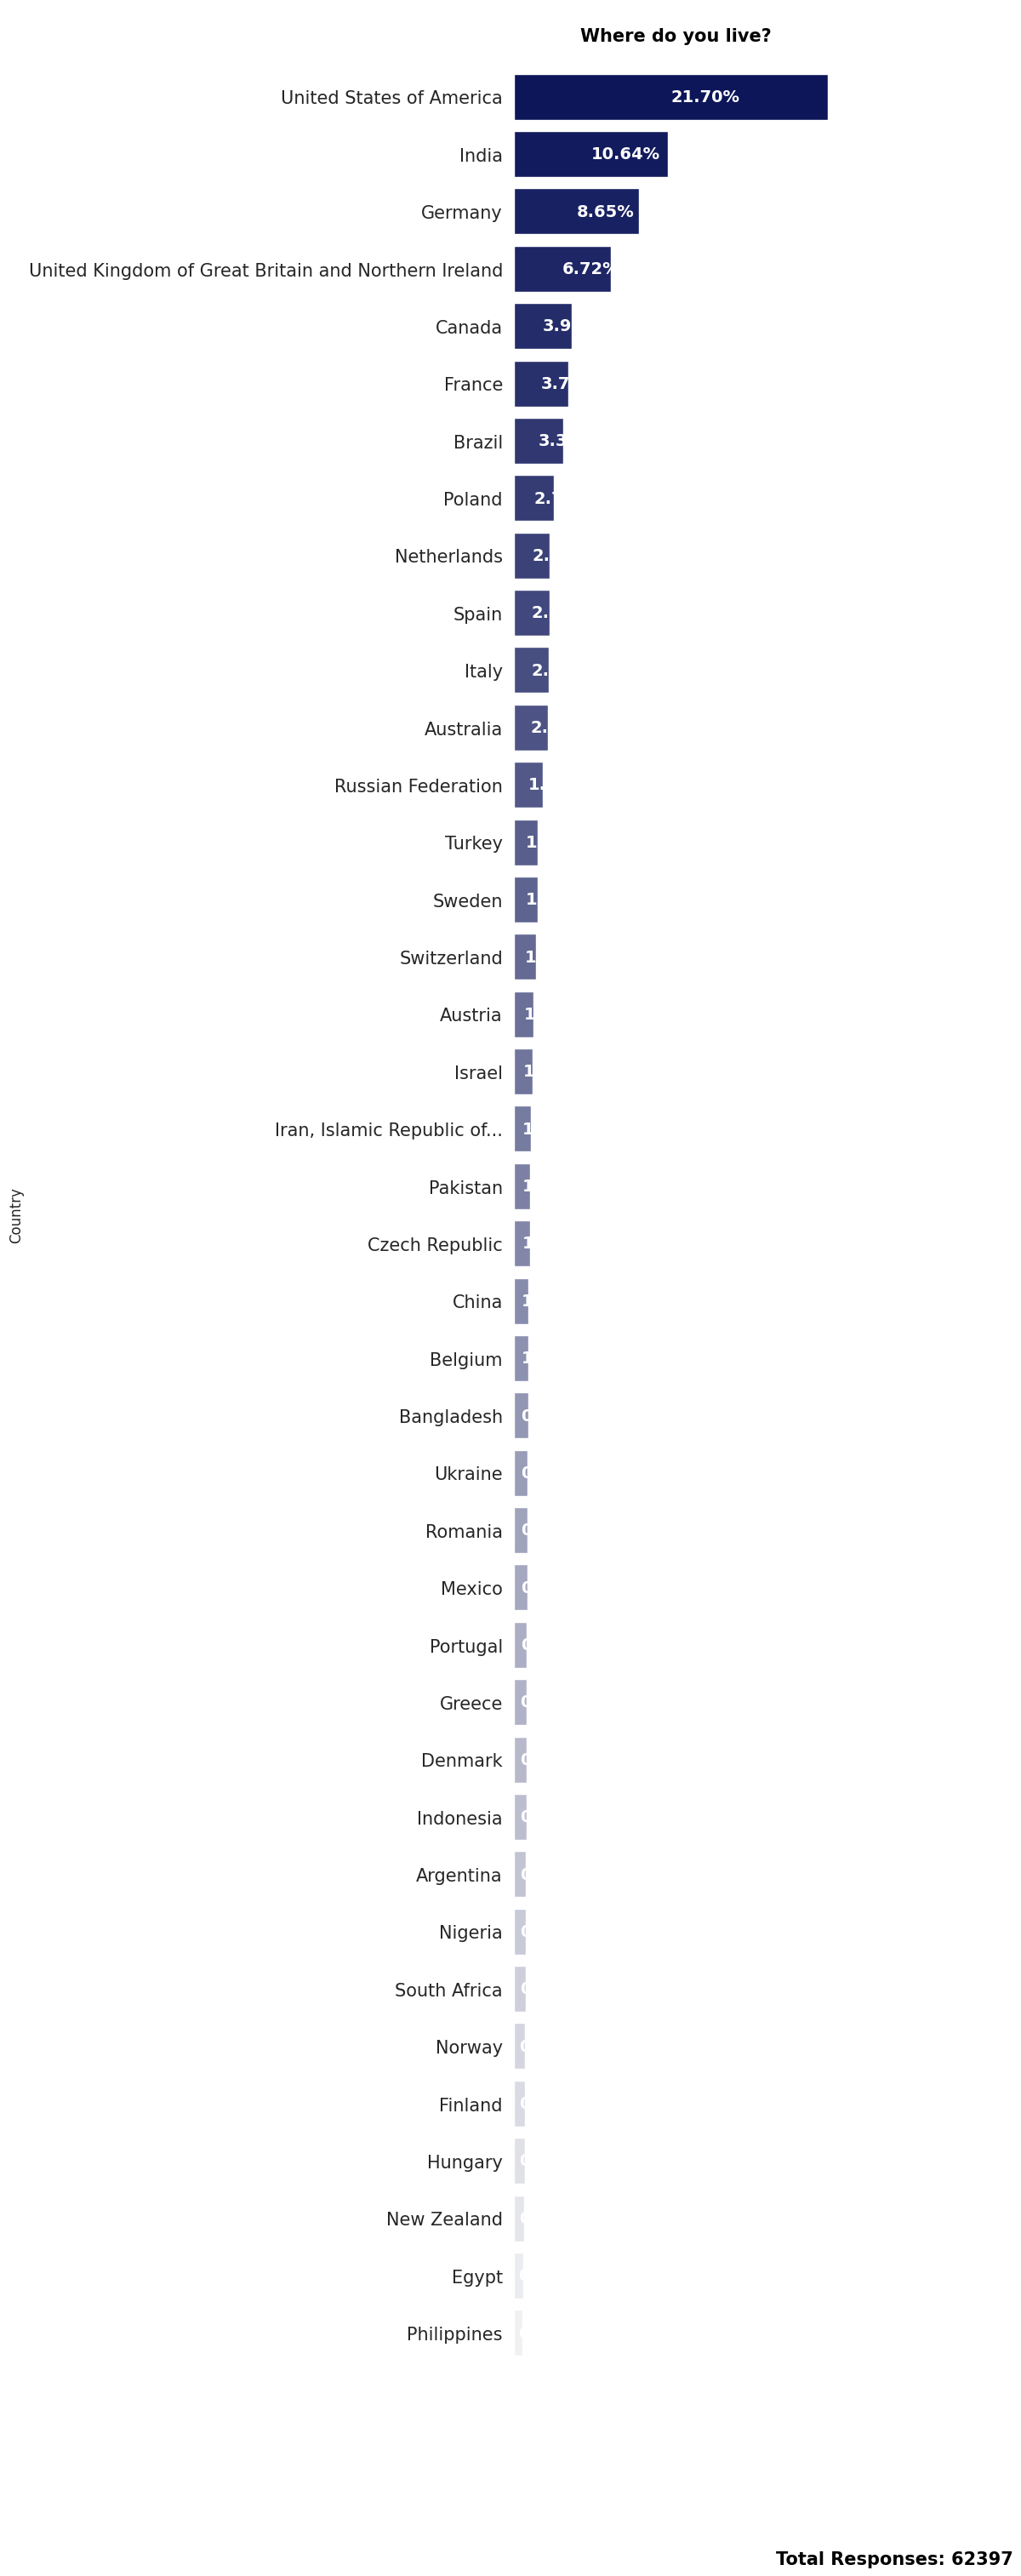

In [79]:
country = survey_df.Country.value_counts()[:40]

custom_plot(country, y_label_font_size=15, plot_height=35,
            title= schema_df.Country.split('<')[0], 
            color = 'light:#000C66')     

# Map plot of country with developer count

In [119]:
d = survey_df.Country.value_counts().reset_index()

In [107]:
d.to_csv('country_for_map.csv')

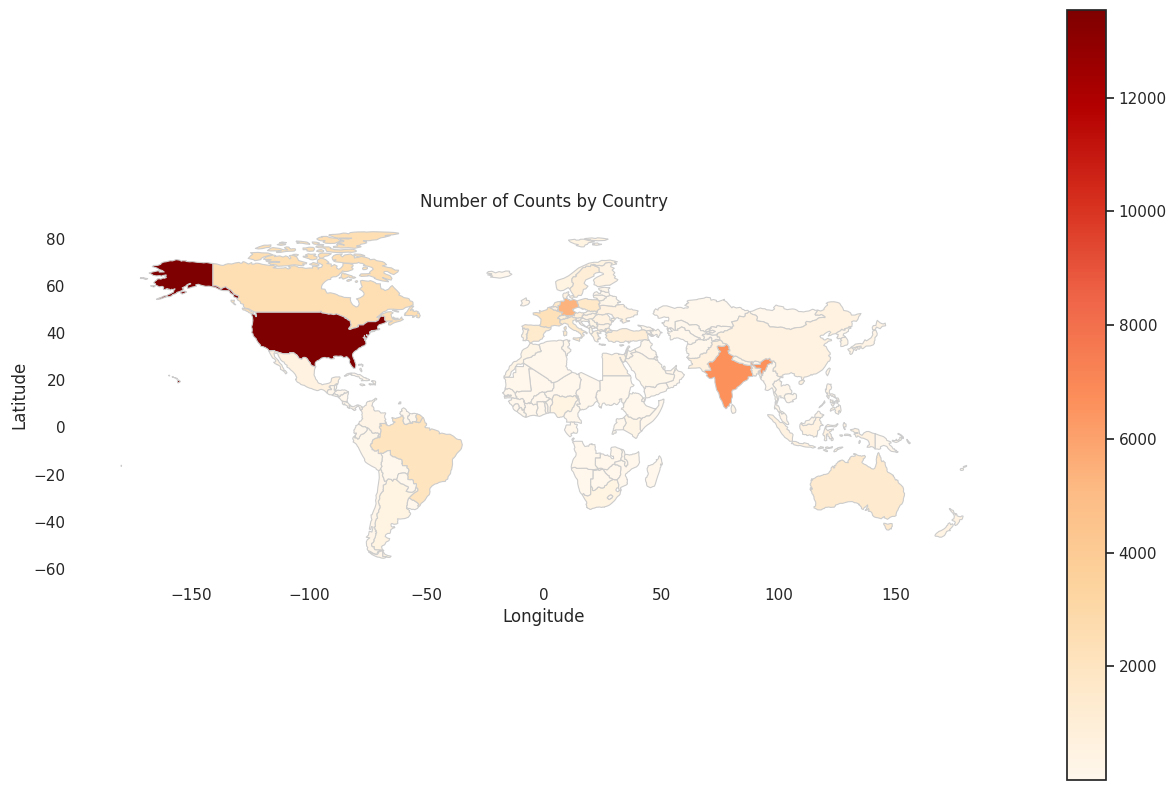

In [84]:
import geopandas as gpd

data = pd.read_csv("country_for_map.csv")

# Load the world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the data DataFrame
world = world.merge(data, how='left', left_on='name', right_on='Country')

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.plot(column='count', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)


plt.title('Number of Counts by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

---
---

###  Which currency does developer use day-to-day?


In [ ]:
# Currency

In [85]:
schema_df.Currency

"Which currency do you use day-to-day? If your answer is complicated, please pick the one you're most comfortable estimating in. *"

In [88]:
survey_df.Currency.value_counts()

Currency
EUR European Euro              12634
USD\tUnited States dollar      12346
INR\tIndian rupee               4229
GBP\tPound sterling             3318
CAD\tCanadian dollar            1847
                               ...  
BND\tBrunei dollar                 1
PGK\tPapua New Guinean kina        1
SHP\tSaint Helena pound            1
GIP\tGibraltar pound               1
TOP\tTongan pa’anga                1
Name: count, Length: 142, dtype: int64

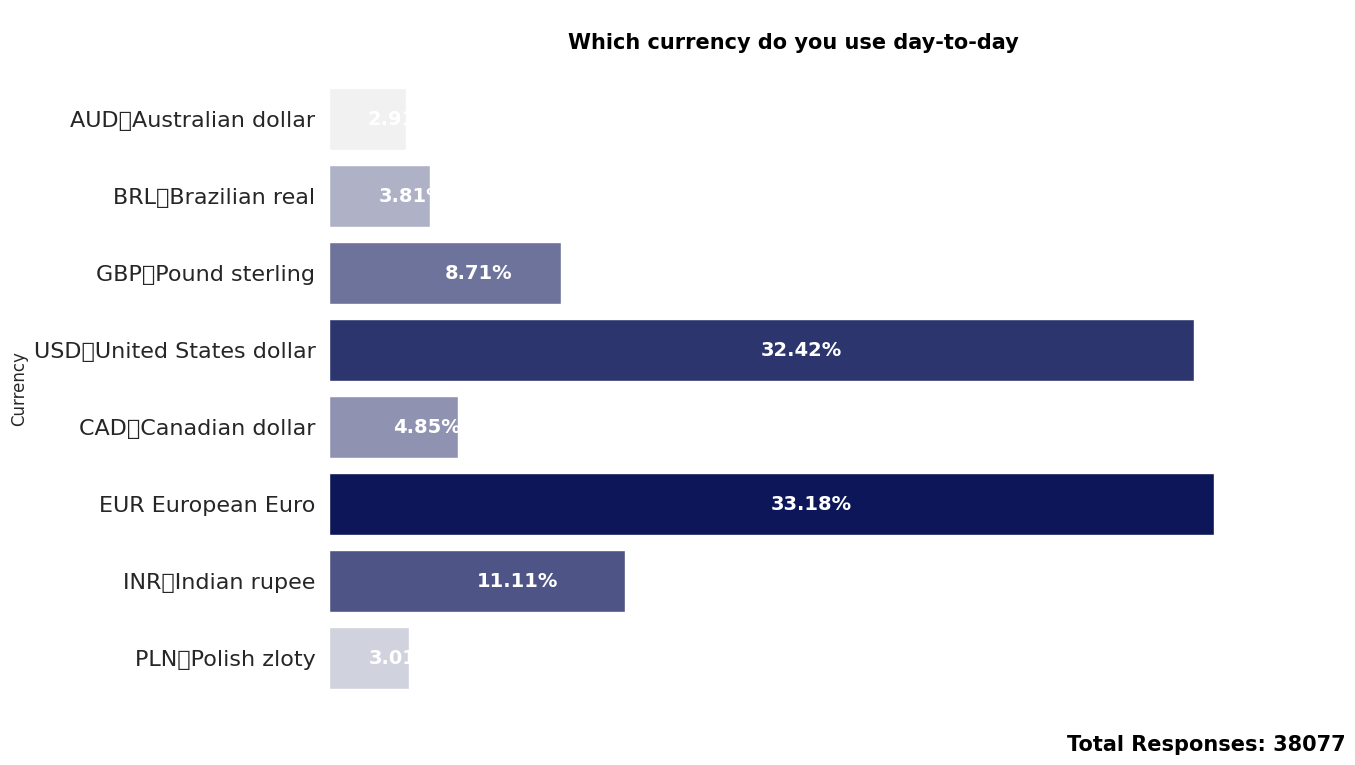

In [97]:
currency = survey_df.Currency.value_counts()[:8]
currency = currency.sample(len(currency))

custom_plot(currency, plot_height=8, plot_width=12,
           color = 'light:#000C66', 
           title=schema_df.Currency.split('?')[0], 
           y_label_font_size=16)

# VersionControlSystem

In [ ]:
# VersionControlSystem

In [98]:
schema_df.VersionControlSystem

'What are the primary <b>version control systems</b> you use? Select all that apply.'

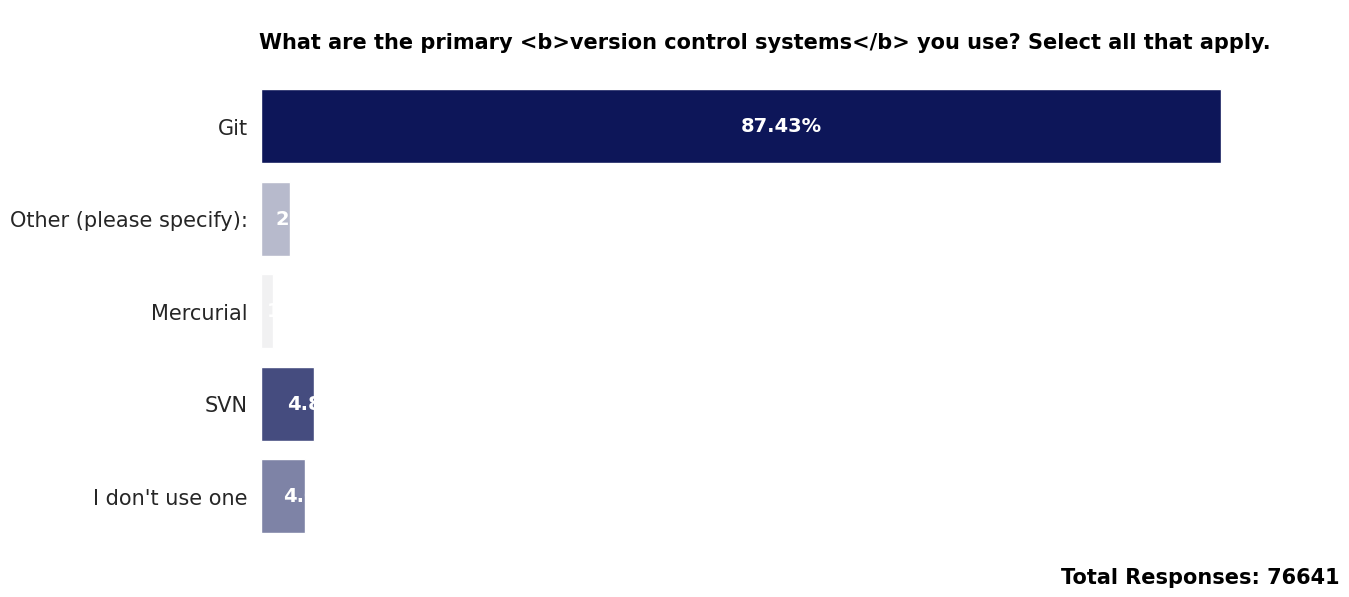

In [102]:
vcs = colum_expand(survey_df.VersionControlSystem)

custom_plot(vcs, plot_height=6, plot_width=13, color = 'light:#000C66',
           y_label_font_size=15, title=schema_df.VersionControlSystem)

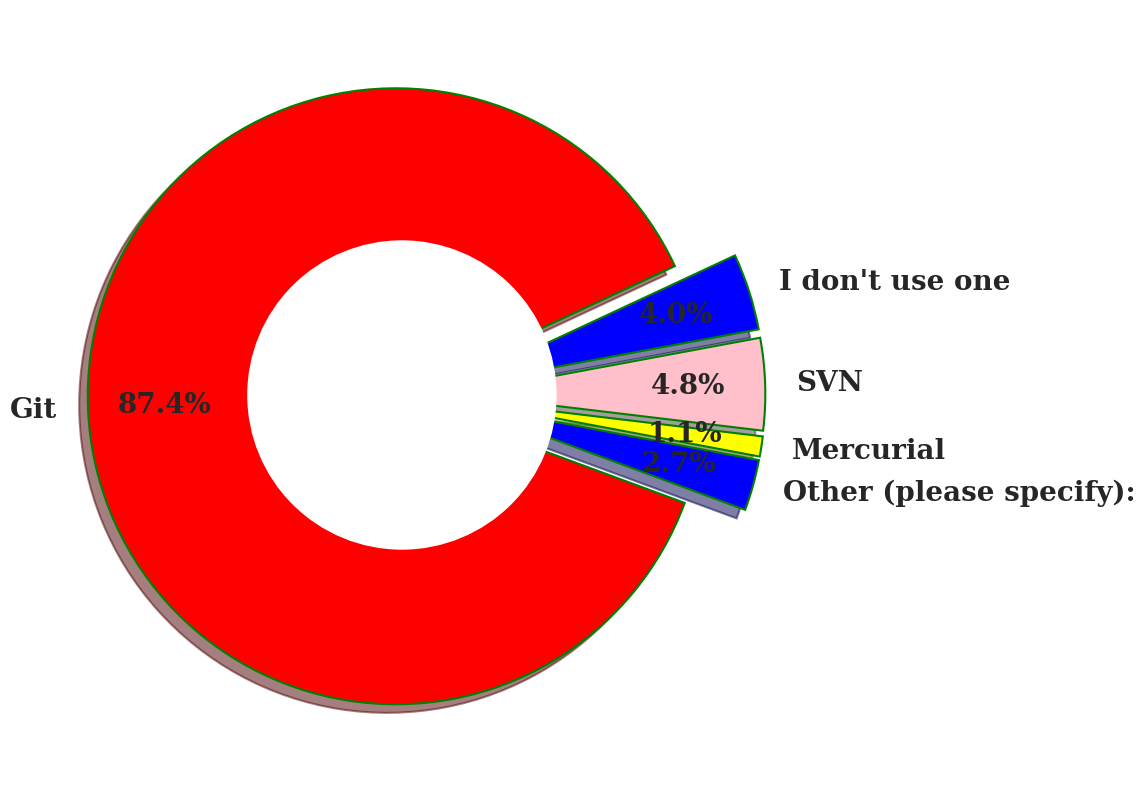

In [105]:
plot_pie(vcs, startangle=25,
        distance_btwn_pieces=0.1)

---
---

# what is your gender..?

In [ ]:
# Gender

In [108]:
colum_expand(survey_df.Gender)

Man                                                  65097
Or, in your own words:                                 521
Woman                                                 3662
Non-binary, genderqueer, or gender non-conforming     1186
Prefer not to say                                     1172
dtype: int64

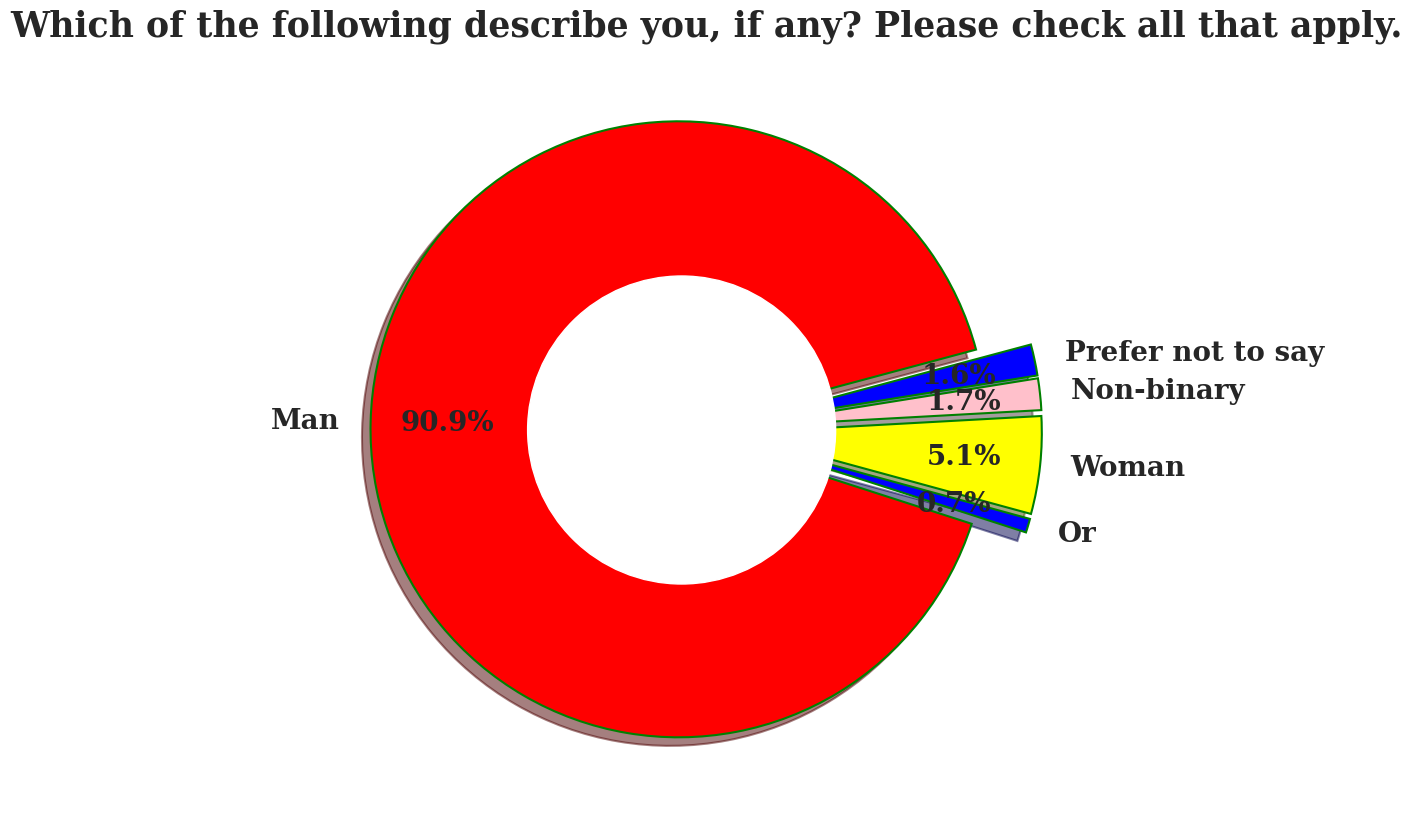

In [109]:
gender = colum_expand(survey_df.Gender)

gender.rename( lambda x: x.split(',')[0], inplace=True )

plot_pie(gender,distance_btwn_pieces=0.09, startangle=15, 
        title=schema_df.Gender)

---
---
# ethincity of developer

In [ ]:
# Ethnicity

In [110]:
schema_df.Ethnicity

'Which of the following describe you, if any? Please check all that apply.'

In [113]:
colum_expand(survey_df.Ethnicity)

White                                                            27360
Or, in your own words:                                            1524
Indian                                                            6739
European                                                         25877
North American                                                    2331
Middle Eastern                                                    2850
Ethnoreligious group                                               348
Prefer not to say                                                 1732
African                                                           2294
Asian                                                             6586
East Asian                                                        1214
Black                                                             1028
Caribbean                                                          460
Southeast Asian                                                   1618
Centra

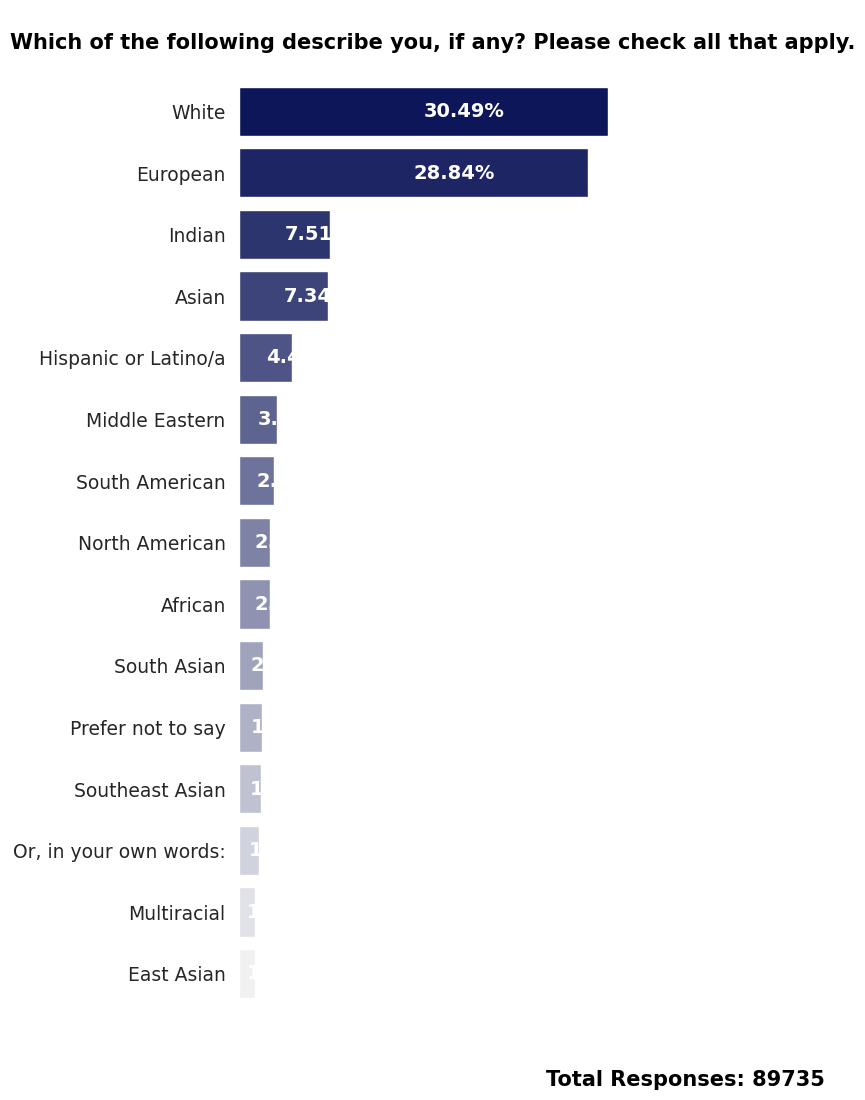

In [114]:
ethincity = colum_expand(survey_df.Ethnicity).nlargest(15)

custom_plot(ethincity, plot_height=12, title=schema_df.Ethnicity, color = 'light:#000C66')

---
---


# How many years of working experience do you have?

In [ ]:
# WorkExp

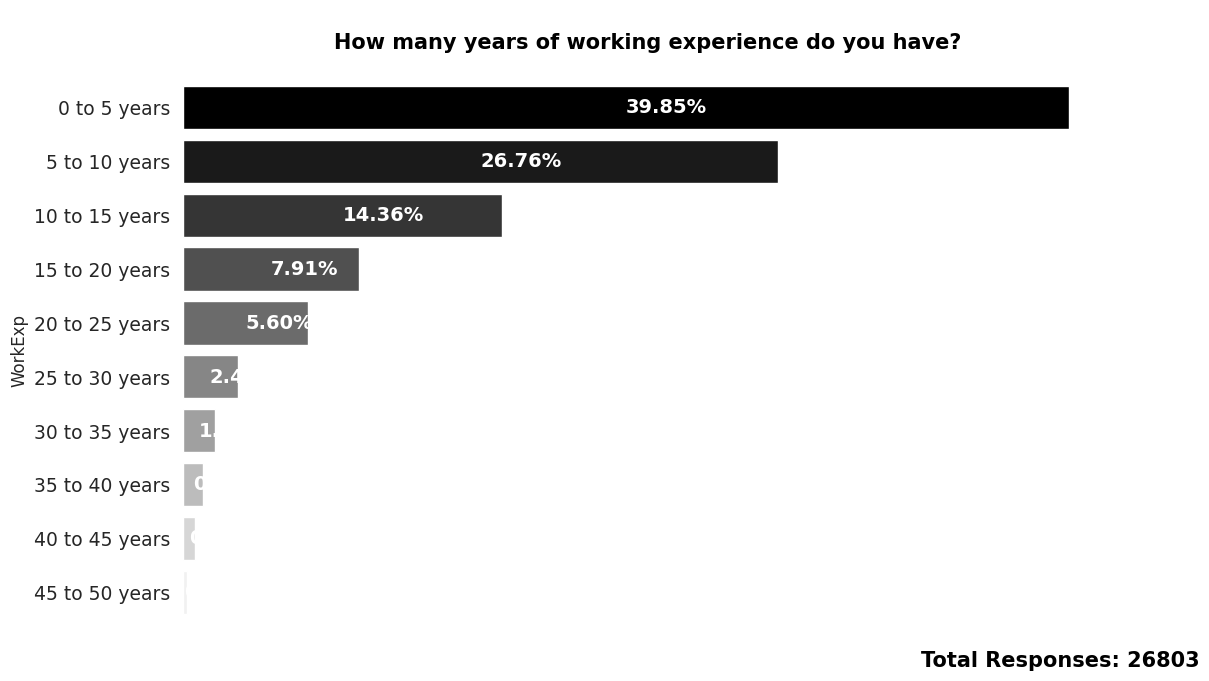

In [121]:
work_exp = survey_df.WorkExp.apply(make_groups).value_counts()


custom_plot(work_exp, plot_height=7, plot_width=12, title=schema_df.WorkExp,color='light:black')

---
---

# which technologies does your company have?

In [ ]:
# ProfessionalTech

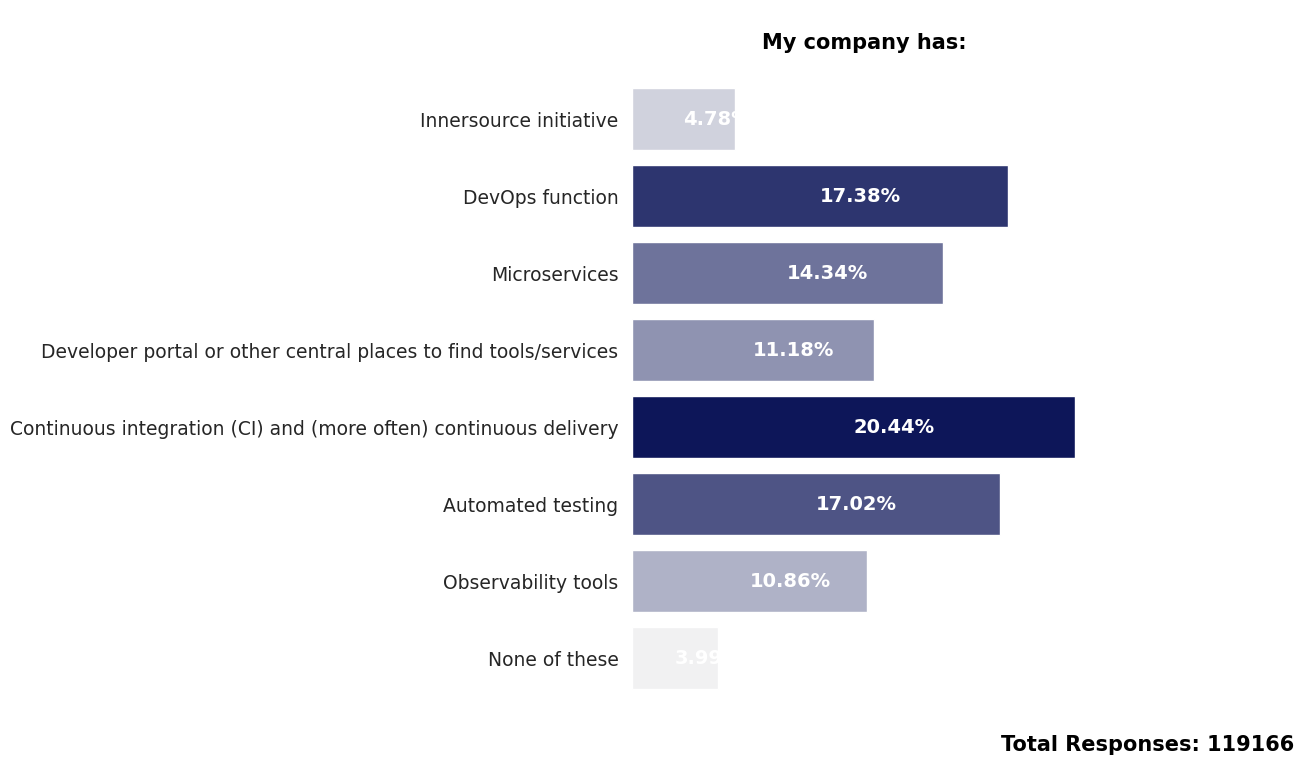

In [125]:
tech = colum_expand(survey_df.ProfessionalTech)

custom_plot(tech, plot_height=8, plot_width=6, color = 'light:#000C66',
           title=schema_df.ProfessionalTech)

---
---


## Which programming, scripting, and markup languages have you done extensive development work in over the past year

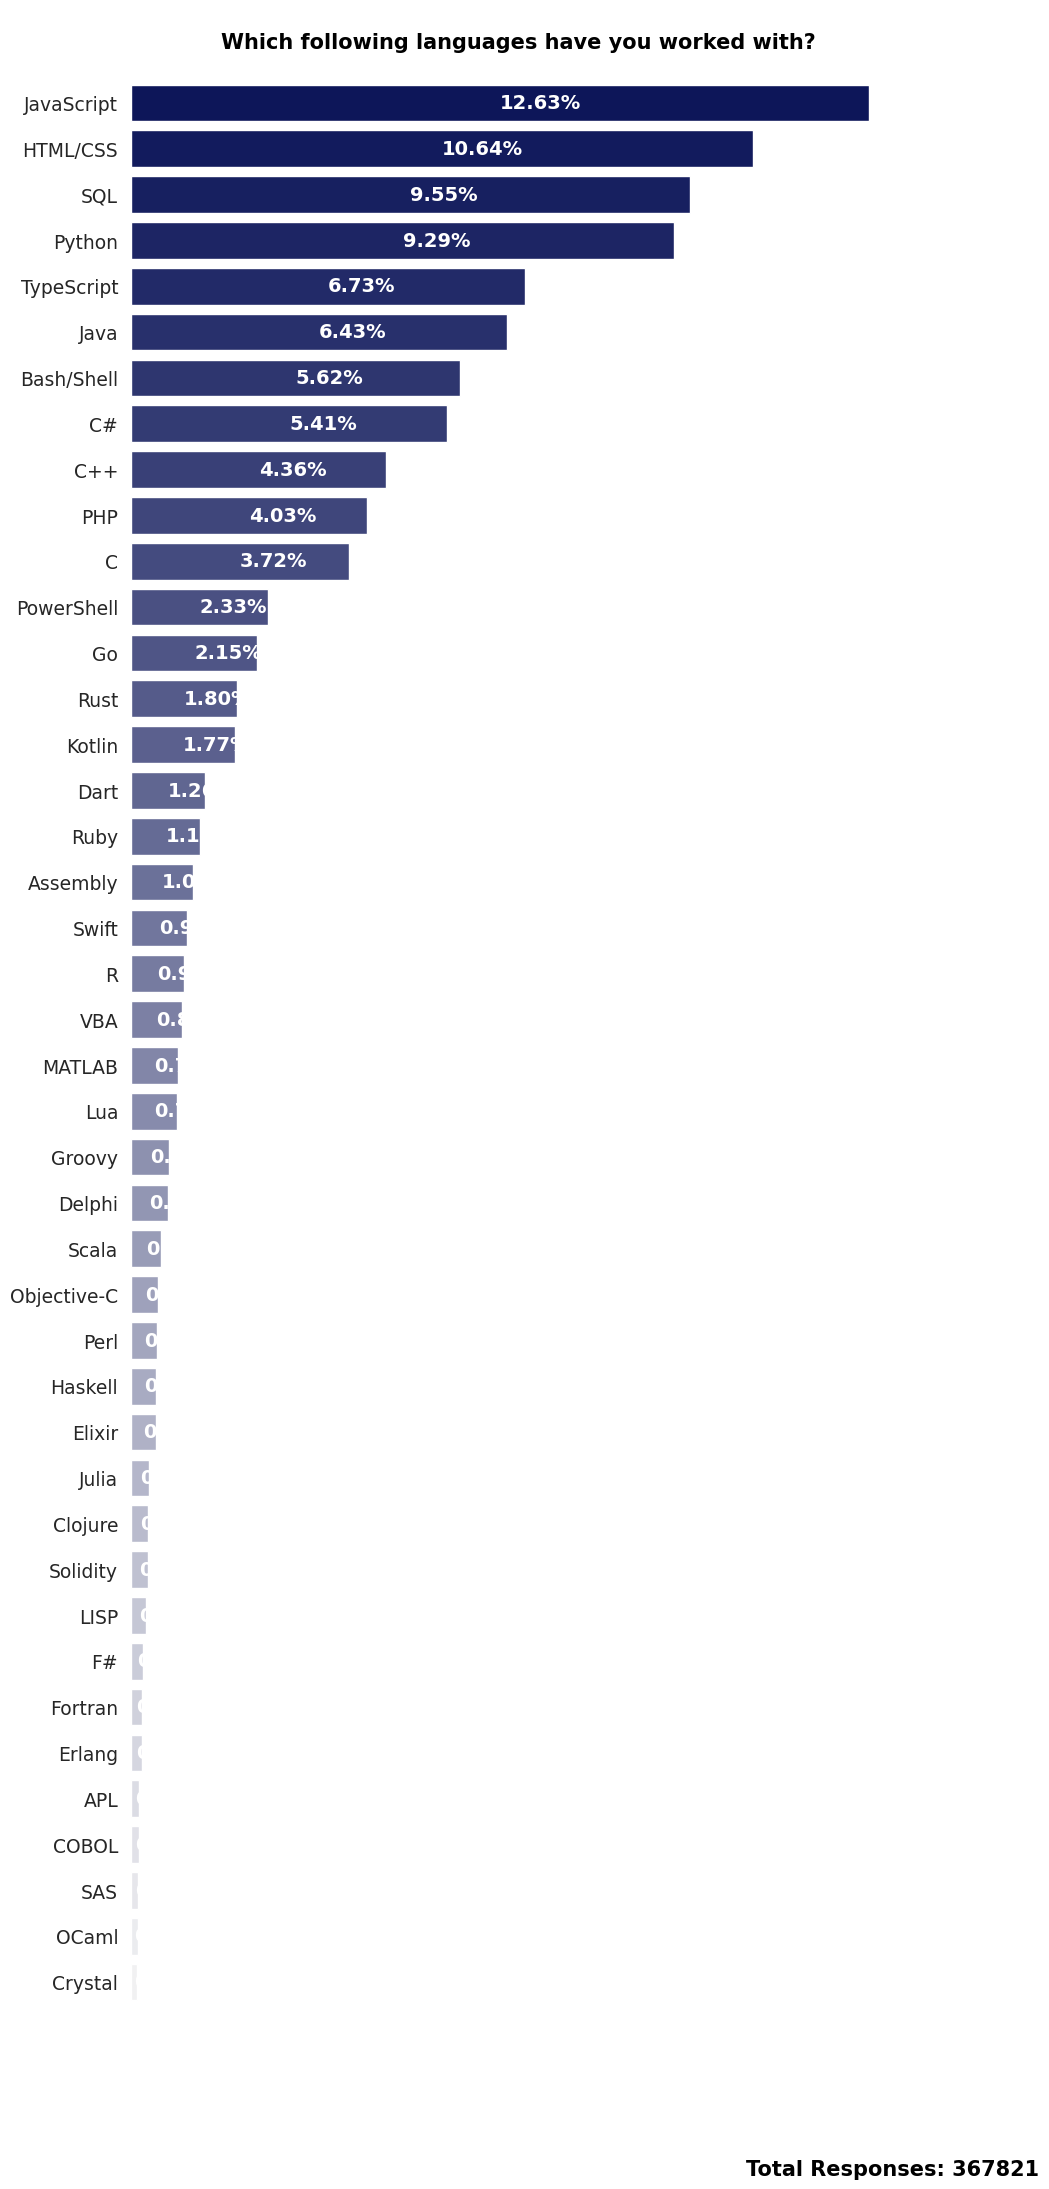

In [128]:
languages = colum_expand(survey_df.LanguageHaveWorkedWith).sort_values(ascending=False)

s = 'Which following languages have you worked with?'

custom_plot(languages, plot_height=25,plot_width=10, title=s,color = 'light:#000C66')

In [ ]:
survey_df.WebframeHaveWorkedWith     # django flask   
survey_df.WebframeWantToWorkWith

survey_df.LanguageWantToWorkWith

survey_df.DatabaseHaveWorkedWith
survey_df.DatabaseWantToWorkWith

survey_df.PlatformHaveWorkedWith    
survey_df.PlatformWantToWorkWith

survey_df.MiscTechHaveWorkedWith   
survey_df.MiscTechWantToWorkWith 

survey_df.ToolsTechHaveWorkedWith   
survey_df.ToolsTechWantToWorkWith     

survey_df.CompTotal                  # annual income
survey_df['OpSysPersonal use']       # operating system

---

<h1><center>E N D</center></h1>

---